# DSI Capstone Project - Veganism

##### Import Packages

In [689]:
import pandas as pd
import numpy as np
import re

from selenium import webdriver
from bs4 import BeautifulSoup

import time
from random import randint

from wordcloud import WordCloud, STOPWORDS
import numpy as np 
import pandas as pd 
from PIL import Image 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

import folium 
from folium import plugins

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Web Scraping

#### Import URL CSV

In [107]:
df = pd.read_csv("./URL CSV's/masterurl.csv") 
Master_URL = df["URL"].tolist()

#### Remove honey pot urls

In [108]:
# Import city .csv list to cross reference with
all_city = pd.read_csv("../../Desktop/uscities.csv") 
all_city = all_city.pop('city_ascii').to_list()
city_df = pd.DataFrame(all_city, columns=['cities'])

In [109]:
# Remove text
city_df.cities = city_df.loc[:,'cities'].str.replace(' ','_')
# Make lowercase
city_df.cities = city_df.cities.str.lower()
city_list = city_df.cities.to_list()
city_list

['south_creek',
 'roslyn',
 'sprague',
 'gig_harbor',
 'lake_cassidy',
 'tenino',
 'jamestown',
 'three_lakes',
 'curlew_lake',
 'chain_lake',
 'pateros',
 'rosburg',
 'parkland',
 'birch_bay',
 'ashford',
 'navy_yard_city',
 'omak',
 'farmington',
 'buckley',
 'cathcart',
 'poulsbo',
 'anacortes',
 'maplewood',
 'creston',
 'rockford',
 'wishram',
 'centralia',
 'south_hill',
 'longview_heights',
 'erlands_point-kitsap_lake',
 'amboy',
 'st._john',
 'dallesport',
 'ketron_island',
 'mesa',
 'fife',
 'moses_lake_north',
 'chewelah',
 'grayland',
 'kittitas',
 'camano',
 'monroe_north',
 'north_bonneville',
 'klickitat',
 'loon_lake',
 'newport',
 'mead',
 'cashmere',
 'aberdeen_gardens',
 'ocean_shores',
 'basin_city',
 'wilkeson',
 'meadow_glade',
 'arlington_heights',
 'uniontown',
 'oakesdale',
 'west_side_highway',
 'conconully',
 'latah',
 'elma',
 'tieton',
 'southworth',
 'danville',
 'toppenish',
 'river_road',
 'geneva',
 'yakima',
 'moxee',
 'edmonds',
 'kalama',
 'laurier',


In [110]:
clean = df.URL.str.rstrip('//')
clean

0                /north_america/usa/alabama/auburn
1              /north_america/usa/alabama/bessemer
2            /north_america/usa/alabama/birmingham
3                /north_america/usa/alabama/dothan
4                 /north_america/usa/alabama/foley
                           ...                    
1185    /north_america/usa/wisconsin/stevens_point
1186          /north_america/usa/wisconsin/viroqua
1187           /north_america/usa/wisconsin/wausau
1188        /north_america/usa/wisconsin/wauwatosa
1189            /north_america/usa/wyoming/laramie
Name: URL, Length: 1190, dtype: object

In [111]:
# Regex to find text after last forward slash
regex = r'([^\/]+$)'

In [112]:
# Code to loop through URL list and remove honeypot

master = []

#df.URL.str.rstrip('//')
i = 0
for urls in clean:
    #print(urls.index)
    #print(urls)
    pattern = re.compile(r'([^\/]+$)')
    city = re.findall(pattern, urls)[0]
#     print(city)
    if city not in city_list:
        master.append(city)
        del clean[i]
    i += 1

clean 

0                /north_america/usa/alabama/auburn
1              /north_america/usa/alabama/bessemer
2            /north_america/usa/alabama/birmingham
3                /north_america/usa/alabama/dothan
4                 /north_america/usa/alabama/foley
                           ...                    
1185    /north_america/usa/wisconsin/stevens_point
1186          /north_america/usa/wisconsin/viroqua
1187           /north_america/usa/wisconsin/wausau
1188        /north_america/usa/wisconsin/wauwatosa
1189            /north_america/usa/wyoming/laramie
Name: URL, Length: 1024, dtype: object

#### Print URL List

In [252]:
# Old/Unclean URL list
Master_URL

['/north_america/usa/alabama/auburn/',
 '/north_america/usa/alabama/bessemer/',
 '/north_america/usa/alabama/birmingham/',
 '/north_america/usa/alabama/dothan/',
 '/north_america/usa/alabama/foley/',
 '/north_america/usa/alabama/huntsville/',
 '/north_america/usa/alabama/tuscaloosa/',
 '/north_america/usa/alabama/ymjmowin/',
 '/north_america/usa/alaska/fairbanks/',
 '/north_america/usa/alaska/talkeetna/',
 '/north_america/usa/arizona/bisbee/',
 '/north_america/usa/arizona/chandler/',
 '/north_america/usa/arizona/cottonwood/',
 '/north_america/usa/arizona/flagstaff/',
 '/north_america/usa/arizona/gilbert/',
 '/north_america/usa/arizona/glendale/',
 '/north_america/usa/arizona/lake_havasu_city/',
 '/north_america/usa/arizona/litchfield_park/',
 '/north_america/usa/arizona/mesa/',
 '/north_america/usa/arizona/phoenix/',
 '/north_america/usa/arizona/scottsdale/',
 '/north_america/usa/arizona/sedona/',
 '/north_america/usa/arizona/tempe/',
 '/north_america/usa/arizona/tucson/',
 '/north_ame

In [114]:
len(clean)

1024

In [397]:
# New/Clean URL list
for i in clean:
    print(i)

/north_america/usa/alabama/auburn
/north_america/usa/alabama/bessemer
/north_america/usa/alabama/birmingham
/north_america/usa/alabama/dothan
/north_america/usa/alabama/foley
/north_america/usa/alabama/huntsville
/north_america/usa/alabama/tuscaloosa
/north_america/usa/alaska/fairbanks
/north_america/usa/alaska/talkeetna
/north_america/usa/arizona/bisbee
/north_america/usa/arizona/chandler
/north_america/usa/arizona/cottonwood
/north_america/usa/arizona/flagstaff
/north_america/usa/arizona/gilbert
/north_america/usa/arizona/glendale
/north_america/usa/arizona/lake_havasu_city
/north_america/usa/arizona/litchfield_park
/north_america/usa/arizona/mesa
/north_america/usa/arizona/phoenix
/north_america/usa/arizona/scottsdale
/north_america/usa/arizona/sedona
/north_america/usa/arizona/tempe
/north_america/usa/arizona/tucson
/north_america/usa/arkansas/fayetteville
/north_america/usa/arkansas/fort_smith
/north_america/usa/arkansas/little_rock
/north_america/usa/california/albany
/north_amer

#### Save to CSV

In [ ]:
pd.DataFrame({'URL': }).to_csv('.csv')

#### Find Proxy

In [ ]:
from bs4 import BeautifulSoup as soup
import requests

def get_proxies():
    proxy_web_site = 'https://free-proxy-list.net/'
    response = requests.get(proxy_web_site)
    page_html = response.text
    page_soup = soup(page_html, "html.parser")
    containers = page_soup.find_all("div", {"class": "table-responsive"})[0]
    ip_index = [8*k for k in range(80)]
    proxies = set()
    for i in ip_index:
        ip = containers.find_all("td")[i].text
        port = containers.find_all("td")[i+1].text
        https = containers.find_all("td")[i+6].text
        print("\nip address : {}".format(ip))
        print("port : {}".format(port))
        print("https : {}".format(https))
        if https == 'yes':
            proxy = ip + ':' + port
            proxies.add(proxy)
    return proxies 

In [ ]:
def check_proxies():
    working_proxies = set()
    proxies = get_proxies()            
    test_url = 'https://httpbin.org/ip'    
    for i in proxies:
        print("\nTrying to connect with proxy: {}".format(i))
        try:
            response = requests.get(test_url, proxies={"http": i, "https": i}, timeout = 5)
            print(response.json())
            print("This proxy has been added to the list! Hooray!")
            working_proxies.add(i)
        except:
            print("Fuck this shit. Connnection error")
    return working_proxies
working_proxies = check_proxies()

In [ ]:
working_proxies

#### Initiate Driver

In [255]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--proxy-server=186.56.99.103:53040')
#chrome_options.add_argument('headless')

In [256]:
driver = webdriver.Chrome(options=chrome_options, executable_path=('../../Desktop/dsi/chromedriver'))
driver.get('https://www.happycow.net/north_america/usa/?filters=vegan-vegetarian')

### Scrape Code

In [398]:
name = []
address = []
category = []
desc = []
cuisine = []
rating = []
state = ''
while state != 'exit':
    state = input('What state should I scrape next master: ')
    if state == 'exit': break
    new_cityurl = [x for x in clean if state in x]
    for c in new_cityurl:
        #time.sleep(randint(1,2))
        driver.get('https://www.happycow.net'+c+'?filters=vegan-vegetarian')
        #time.sleep(randint(1,2))
        soup = BeautifulSoup(driver.page_source,'lxml')
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        #time.sleep(randint(1,2))
        driver.execute_script("window.scrollTo(document.body.scrollHeight, 0);")
        if randint(1,2) == 2:
            try:
                button = driver.find_element_by_xpath('/html/body/div[1]/div[1]/div/div[1]/div/div/div[2]/ul[3]/li[2]/button')
                button.click()
                time.sleep(1)
                username = driver.find_element_by_xpath('//*[@id="dialog-username"]')
                password = driver.find_element_by_xpath('//*[@id="password"]')
                username.send_keys("testytest719@gmail.com")
                time.sleep(1)
                password.send_keys("Finesse10")
                submit = driver.find_element_by_xpath('//*[@id="login"]')
                submit.click()
            except:
                pass
        #time.sleep(randint(1,2))
        #driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        resto_list = soup.find_all('div',{'class':'venue-list-item'})
        for resto in resto_list:
            try:
                name.append(resto.find('h4').text.strip())
                address.append(resto.find('p',{'region__element__desc'}).text)
                category.append(resto.find('li',{'class':'list__item'}).text.strip())
                desc.append(resto.find_all('div',{'class':'region__element'})[1].text.strip())
                cuisine.append(resto.find_all('div',{'class':'region__element'})[0].find_all('p')[-1].text.strip())
                rating.append(resto.find_all('a')[5].get('title').strip())
            except:
                pass
    restos = pd.DataFrame({'Name': name,
                           'Category': category,
                           'Description': desc,
                           'Cuisine': cuisine,
                           'Address': address,
                           'Rating': rating})
    file_name = state + '_restodata' + '.csv'
    restos.to_csv(file_name)
    name = []
    address = []
    category = []
    desc = []
    cuisine = []
    rating = []
    print(restos.shape)
    #driver.quit()

What state should I scrape next master: exit


#### Table with state scrape progress

| State       | Scraped     | Problem    |
| :------------- | :----------: | -----------: |
| **alabama** | 8/8 |
| **alaska** | 2/2
| **arizona** | 68/68
| **arkanasas** | 8/8
                                    | california | 543/658 | too large
| **colorado** | 46/46
| **connecticut** | 32/32 |  missed town  |
| **delaware** | 8/8
| **district_of_columbia**   | 27/38 | 2nd page |
| **florida** | 185/218 | too large
| **georgia** | 65/78  | missing towns |
| **hawaii** | 62/63  | 
| **idaho** | 3/3 
| **illinois** | 61/99 | 
|**indiana** | 20/22 | 1-2 towns
| **iowa** | 14/14 | missed
| **kansas** | 10/4 | picked up arkansas, still missed
| **kentucky** | 20/20 | missed towns
|**louisiana** | 19/19
| **Maine** | 15/15
| **maryland** | 47/47
                                    | massachusetts | 68/112
| **michigan** | 62/64 
| **minnesota** | 20/25 | missed
| **mississippi** | 5/5
| **missouri** | 24/24
| **montana** | 5/5
| **nebraska** | 8/8
| **nevada** | 37/36 | 
| **new_hampshire** | 13/13
                                    | new_jersey | 118/146 |
| **new_mexico** | 13/13 |
                                    | new_york | 155/371
| **north_carolina** | 63/63 |
| **north_dakota** | 1/1
| **ohio** | 67/67 
| **oklahoma**| 10/10 
| **oregon** | 61/115 | 2nd pages, portland etc.
                                    | pennsylvania | 81/103
|**rhode_island** | 12/13
| **south_carolina** | 27/27
| **south_dakota** | 1/1
| **tennessee** | 45/47
                                    | texas | 119/194
| **utah** | 21/21 |
| **vermont** | 11/11
| **virginia** | 49/54
|**washington** | 98/91 | 2nd page for DC
| **west virginia** | 8/8
|**wisconsin** | 26/26
| **wyoming**| 1/1

In [ ]:
new_jersey, oregon, texas, (cities: nyc, brooklyn, los angeles, austin)

## Cleaning and EDA

#### Clean steps

- **Dummify cuisine**
- **Remove and combine Cuisines**

- nlp on description/cuisine
- top cuisines (separate and count)
- top cuisine by state


##### Future
- Sentiment analysis on reviews
- 

#### Pandas Report

In [162]:
conda install -c conda-forge pandas-profiling

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [163]:
import pandas_profiling
raw.profile_report()

KeyboardInterrupt: 

#### Concatenate all .csv Files

In [646]:
import glob

path = ('/Users/axellillsunde/General_Assembly/Capstone')
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

raw = pd.concat(li, axis=0, ignore_index=True)
raw.shape
#df.info()

(2426, 7)

#### General Clean

In [647]:
# DROP FIRST COLUMN & RESET INDEX
raw.drop(['Unnamed: 0'], axis=1, inplace=True)

# Reset index
raw.reset_index(drop=True, inplace=True)

# Change order of columns
raw = raw[['Name', 'Rating', 'Category', 'Address', 'Cuisine', 'Description']]
raw.head(1)

,Name,Rating,Category,Address,Cuisine,Description
0,Annapurna's World Vegetarian Cafe - 4th St,4.5 stars - View reviews,Vegetarian,"5939 4th St NW, Albuquerque, New Mexico","Cuisine: Vegan-friendly, Lacto, American, Pizz...",The third Annapurna's Cafe opened in 2009 prev...


In [648]:
raw.drop_duplicates(keep=False,inplace=True)
raw.shape

(2338, 6)

#### Rating Column

In [649]:
# CLEAN RATING COLUMN

# Remove text
raw.Rating = raw.loc[:,'Rating'].str.replace(' stars - View reviews','')

# Replace null value cells
raw.Rating = raw.Rating.str.replace('Create the first review','0.0')

# Convert to float
raw.Rating = raw.Rating.astype(float).fillna(0.0)

In [650]:
# Search and display rows that do not start with cuisine
raw[~raw.Cuisine.str.contains("Cuisine:")][0::]

,Name,Rating,Category,Address,Cuisine,Description
1312,Juice it Up,0.0,Vegetarian,"72877 Dinah Shore Dr (at Monterey), Rancho Mi...","Now Open:\n \n Mon-Fri 7:00am-9:00pm, Sa...","Juice, smoothie, and acai bowl franchise. Allo..."
1694,Fever's Grill and Juice Bar,0.0,Vegetarian,"1001 3rd Ave W, Birmingham, Alabama",Loading...,Accepts call-in orders on weekdays. Makes vege...


In [651]:
# ^Drop the rows above or replace with NaN^

#### Category Column

In [652]:
# DUMMIFY CATEGORY COLUMN
dummy = pd.get_dummies(df.Category)

# Combine DataFrames
raw = pd.concat([raw, dummy], axis=1)

# Reorder dataframe
raw = raw[['Name', 'Category', 'Vegan', 'Vegetarian', 'Rating', 'Address', 'Cuisine', 'Description']]
raw.head(2)

,Name,Category,Vegan,Vegetarian,Rating,Address,Cuisine,Description
0,Annapurna's World Vegetarian Cafe - 4th St,Vegetarian,0.0,1.0,4.5,"5939 4th St NW, Albuquerque, New Mexico","Cuisine: Vegan-friendly, Lacto, American, Pizz...",The third Annapurna's Cafe opened in 2009 prev...
1,Annapurna's World Vegetarian Cafe - The Promenade,Vegetarian,0.0,1.0,5.0,"5200 Eubank NE Ste E7, Albuquerque, New Mexico","Cuisine: Vegan-friendly, American, Pizza, Inte...",Its 4th location in NM offering Ayurvedic cuis...


In [653]:
raw['Category'].value_counts(normalize=True)

Vegan         0.552181
Vegetarian    0.447819
Name: Category, dtype: float64

#### Address Column

In [654]:
# Assign to separate columns
raw[['Street', 'City', 'State']] = raw.Address.str.split(',', 2, expand=True)

# Reorder dataframe
raw = raw[['Name', 'Category', 'Vegan', 'Vegetarian', 'Rating', 'Street', 'City', 'State', 'Address', 'Cuisine', 'Description']]
raw.head(1)

,Name,Category,Vegan,Vegetarian,Rating,Street,City,State,Address,Cuisine,Description
0,Annapurna's World Vegetarian Cafe - 4th St,Vegetarian,0.0,1.0,4.5,5939 4th St NW,Albuquerque,New Mexico,"5939 4th St NW, Albuquerque, New Mexico","Cuisine: Vegan-friendly, Lacto, American, Pizz...",The third Annapurna's Cafe opened in 2009 prev...


In [655]:
new_state = []
# i = 0
for states in raw.State:
    pattern = re.compile(r'[^,]*$')
    new__states = re.findall(pattern, states)[0]
    #print(new__states)
    new_state.append(new__states)
    #print(city)
#     if city not in city_list:
#         master.append(city)
#         del clean[i]
#     i += 1
len(new_state)

2338

In [656]:
new_state

[' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Mexico',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New Hampshire',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',
 ' New York',

In [657]:
raw['States'] = new_state
raw.drop(columns=['State'], inplace=True)

# Only states are now in 'States' column

#### Create wordcloud df's

In [658]:
# Define words for usa wordclouds

d = raw.loc[:, ['Cuisine', 'state']]   # Select two columns
usa_words = d.Cuisine.str.cat(sep=', ')

# Make a df for wordclouds below
wordcloud_df = raw[['Cuisine', 'States']].copy()

#### Replace all redundant cuisines

In [659]:
# CLEAN CUISINE COLUMN

# Remove text
raw.Cuisine = raw.loc[:,'Cuisine'].str.replace('Cuisine: ','')
raw.Cuisine = raw.loc[:,'Cuisine'].str.replace(' ','')
raw['Cuisine'].astype(str)


0       Vegan-friendly,Lacto,American,Pizza,Internatio...
1       Vegan-friendly,American,Pizza,International,Or...
2       Vegan-friendly,Lacto,American,Pizza,Internatio...
3                      Vegan,American,Thai,Take-out,Asian
4                                  Vegan,Bakery,Breakfast
                              ...                        
2421                             Vegan,American,Breakfast
2422               Vegan,American,Organic,Take-out,Bakery
2423                         Vegan,International,Catering
2424                              Vegan-friendly,American
2425    Vegan-friendly,Ovo,American,Indian,Saladbar,Ju...
Name: Cuisine, Length: 2338, dtype: object

In [660]:
# Dummify cuisine column

dum = raw['Cuisine'].str.get_dummies(',')
dum.shape

(2338, 111)

In [661]:
# Replace / Merge columns

# Latin's
dum["latin"] = dum[['LatinAmerican', 'Latin', 'SouthAmerican']].max(axis=1)

# Soul
dum["soulfood"] = dum[['SoulFood', 'Soul', 'Soulfood']].max(axis=1)

# Southern American
dum["southernamerican"] = dum[['Southern', 'SouthernAmerican', 'SouthwesternAmerican']].max(axis=1)
  
# African
dum["african"] = dum[['Afrikan', 'African']].max(axis=1)

# Israeli
dum["israeli"] = dum[['Hebrew', 'Israeli']].max(axis=1)

# Beer/Wine
dum["beer/wine"] = dum[['Beer', 'Beer/Wine']].max(axis=1)

# Indian
dum["indian"] = dum[['HareKrishna', 'Indian']].max(axis=1)

# Saladbar
dum["saladbar"] = dum[['Salad-bar', 'Saladbar']].max(axis=1)

# Drop above columns that have been merged
dum.drop(columns=['Afrikan', 'African','Salad-bar', 'Saladbar','HareKrishna', 'Indian','Beer', 'Beer/Wine','Hebrew', 'Israeli','LatinAmerican', 'Latin', 'SouthAmerican', 'SoulFood', 'Soul', 'Soulfood', 'Southern', 'SouthernAmerican', 'SouthwesternAmerican'], inplace=True)

# Drop irrelavant/highly correlated columns
dum.drop(columns=['BYOB', 'Pick-uponly','beer/wine','Raw','Take-outOnly','NowOpen:\n\nMon-Fri7:00am-9:00pm','Sun9:00am-9:00pm','Sat7:30am-9:00pm','Honey','Lacto','Ovo','Loading...', 'Vegan', 'Vegan-friendly', 'AllRaw', 'Hourschangeregularly', 'sopleasecheckwiththem.', 'Delivery', 'Catering', 'Take-out', 'Take-outonly'], inplace=True)


In [662]:
raw = pd.concat([raw, dum], axis=1)
raw.shape

(2338, 90)

In [663]:
raw.columns

Index(['Name', 'Category', 'Vegan', 'Vegetarian', 'Rating', 'Street', 'City',
       'Address', 'Cuisine', 'Description', 'States', 'American', 'Asian',
       'Australian', 'Ayurvedic', 'Bakery', 'Banquet', 'Bolivian', 'Brazilian',
       'Breakfast', 'British', 'Buddhist', 'Buffet', 'Cafeteria', 'Cajun',
       'Californian', 'Caribbean', 'Chinese', 'Colombian', 'Creole', 'Cuban',
       'Deli', 'Dominican', 'Ecuadorian', 'Egyptian', 'Ethiopian', 'European',
       'Fastfood', 'Filipino', 'French', 'Fusion', 'German', 'Gluten-free',
       'Gourmet', 'Greek', 'Hawaiian', 'Indo-Chinese', 'International', 'Ital',
       'Italian', 'Jain', 'Jamaican', 'Japanese', 'Juicebar', 'Korean',
       'Kosher', 'Macrobiotic', 'Malaysian', 'Mediterranean', 'Mexican',
       'MiddleEastern', 'Nepalese', 'Organic', 'Pakistani', 'PanAsian',
       'Peruvian', 'Pizza', 'Polish', 'Polynesian', 'Scottish', 'SouthIndian',
       'SoutheastAsian', 'Spanish', 'SriLankan', 'Syrian', 'Taiwanese', 'Thai',
   

##### Counting and replacing cuisine columns

**The Cuisine's to Combine:**
 - 'African', 'Afrikan' = 'African'
 - 'Latin', 'LatinAmerican', SouthAmerican = 'Latin'
 - 'Israeli', 'Hebrew' = 'Israeli'
 - 'Southern', 'SouthernAmerican', 'SouthwesternAmerican' = 'SouthernAmerican'
 - 'SoulFood', 'Soulfood', 'Soul' = 'SoulFood'
 -  'Beer', 'Beer/Wine' = 'Beer/Wine'
 - 'HareKrishna', 'Indian' = 'Indian'
 - 'Salad-bar', 'Saladbar', = 'Saladbar',

**Remove:**
'Loading...', 'Vegan', 'Vegan-friendly', 'AllRaw', 'Hourschangeregularly', 'sopleasecheckwiththem.', 'Delivery', 'Catering', 'Take-out', 'Take-outonly', 

In [664]:
df = raw

In [610]:
# Code to replace/merge cuisines
# Not so releavnt but will keep in case

# # Latin's
# df.Cuisine.str.replace('LatinAmerican','Latin').replace('SouthAmerican', 'Latin').replace('Latin', 'Latin')
# # Soul
# df.Cuisine.str.replace('SoulFood', 'Soul').replace('Soulfood', 'Soul').replace('Soulfood', 'Soul')
# # Southern American
# df.Cuisine.str.replace('Southern', 'SouthernAmerican').replace('SouthwesternAmerican', 'SouthernAmerican')  
# # African
# df.Cuisine.str.replace('Afrikan', 'African')
# # Israeli
# df.Cuisine.str.replace('Hebrew', 'Israeli')
# # Beer/Wine
# df.Cuisine.str.replace('Beer', 'Beer/Wine')
# # Indian
# df.Cuisine.str.replace('HareKrishna', 'Indian')
# # Saladbar
# df.Cuisine.str.replace('Salad-bar', 'Saladbar')
# df.Cuisine[238:239]

#### Counting and Grouping

In [611]:
df.columns

Index(['Name', 'Category', 'Vegan', 'Vegetarian', 'Rating', 'Street', 'City',
       'Address', 'Cuisine', 'Description', 'States', 'American', 'Asian',
       'Australian', 'Ayurvedic', 'Bakery', 'Banquet', 'Bolivian', 'Brazilian',
       'Breakfast', 'British', 'Buddhist', 'Buffet', 'Cafeteria', 'Cajun',
       'Californian', 'Caribbean', 'Chinese', 'Colombian', 'Creole', 'Cuban',
       'Deli', 'Dominican', 'Ecuadorian', 'Egyptian', 'Ethiopian', 'European',
       'Fastfood', 'Filipino', 'French', 'Fusion', 'German', 'Gluten-free',
       'Gourmet', 'Greek', 'Hawaiian', 'Indo-Chinese', 'International', 'Ital',
       'Italian', 'Jain', 'Jamaican', 'Japanese', 'Juicebar', 'Korean',
       'Kosher', 'Macrobiotic', 'Malaysian', 'Mediterranean', 'Mexican',
       'MiddleEastern', 'Nepalese', 'Organic', 'Pakistani', 'PanAsian',
       'Peruvian', 'Pizza', 'Polish', 'Polynesian', 'Scottish', 'SouthIndian',
       'SoutheastAsian', 'Spanish', 'SriLankan', 'Syrian', 'Taiwanese', 'Thai',
   

In [612]:
# Print number of time each cuisine appears

import collections
import itertools

dfc = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in df.Cuisine))
dfc.most_common()

[('Take-out', 3608),
 ('American', 3424),
 ('Vegan', 2704),
 ('Vegan-friendly', 1598),
 ('Fastfood', 1532),
 ('Juicebar', 1522),
 ('Organic', 1420),
 ('Lacto', 1400),
 ('Gluten-free', 736),
 ('Catering', 732),
 ('Fusion', 668),
 ('Bakery', 640),
 ('Ovo', 614),
 ('Raw', 604),
 ('Beer/Wine', 566),
 ('Indian', 562),
 ('Honey', 530),
 ('Breakfast', 506),
 ('Delivery', 456),
 ('Asian', 440),
 ('International', 424),
 ('Pizza', 324),
 ('Mexican', 284),
 ('Buffet', 266),
 ('Vietnamese', 208),
 ('Chinese', 204),
 ('Saladbar', 162),
 ('Western', 142),
 ('Mediterranean', 134),
 ('Caribbean', 124),
 ('Thai', 112),
 ('MiddleEastern', 110),
 ('Italian', 106),
 ('Take-outonly', 76),
 ('Japanese', 58),
 ('Kosher', 58),
 ('European', 50),
 ('Latin', 46),
 ('Macrobiotic', 40),
 ('Indo-Chinese', 38),
 ('Jamaican', 28),
 ('Taiwanese', 28),
 ('AllRaw', 24),
 ('Korean', 22),
 ('Hawaiian', 22),
 ('Ethiopian', 16),
 ('Israeli', 16),
 ('SoulFood', 16),
 ('African', 14),
 ('SouthernAmerican', 14),
 ('Buddhist'

In [613]:
# save df to csv
df.to_csv('splitem.csv')


In [713]:
# Most common Vegan cuisines
# read in csv file
vegan = pd.read_csv(r'../../Desktop/vegan.csv', index_col=None, header=0)
vegan_count = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in vegan.Cuisine))
vegan_count.most_common()

[('Vegan', 1352),
 ('American', 1049),
 ('Take-out', 1029),
 ('Fastfood', 429),
 ('Organic', 408),
 ('Juicebar', 376),
 ('Fusion', 242),
 ('Catering', 232),
 ('Gluten-free', 228),
 ('Beer/Wine', 209),
 ('Bakery', 197),
 ('Raw', 175),
 ('Delivery', 168),
 ('Breakfast', 156),
 ('Asian', 154),
 ('International', 125),
 ('Mexican', 110),
 ('Pizza', 105),
 ('Vietnamese', 74),
 ('Chinese', 66),
 ('Caribbean', 57),
 ('Western', 52),
 ('Thai', 46),
 ('Buffet', 42),
 ('Mediterranean', 39),
 ('Italian', 37),
 ('Saladbar', 34),
 ('Japanese', 24),
 ('Take-outonly', 24),
 ('MiddleEastern', 23),
 ('Latin', 18),
 ('European', 18),
 ('Macrobiotic', 15),
 ('Kosher', 14),
 ('Indian', 13),
 ('Jamaican', 12),
 ('AllRaw', 11),
 ('Korean', 10),
 ('Ethiopian', 8),
 ('SoulFood', 8),
 ('SouthernAmerican', 7),
 ('African', 6),
 ('Israeli', 5),
 ('Spanish', 4),
 ('British', 4),
 ('Hawaiian', 4),
 ('French', 3),
 ('Soul', 3),
 ('Brazilian', 3),
 ('Southern', 3),
 ('Taiwanese', 3),
 ('Vegan-friendly', 3),
 ('Latin

In [615]:
vegan.Rating

AttributeError: 'DataFrame' object has no attribute 'Rating'

In [712]:
# Get vegan rating

vegan1 = pd.read_csv(r'../../Desktop/vegan1.csv', index_col=None, header=0)
vegan1.Rating.mean()

4.28270509977827

In [ ]:
# Most common Veggie cuisines
# read in csv file
veggie = pd.read_csv(r'../../Desktop/veggie.csv', index_col=None, header=0)
veggie_count = collections.Counter(itertools.chain.from_iterable(v.split(',') for v in veggie.Cuisine))
veggie_count.most_common()


In [715]:
veggie1 = pd.read_csv(r'../../Desktop/veggie1.csv', index_col=None, header=0)
veggie1.Rating.mean()

4.22972972972973

In [ ]:
# For each state, accumalate all cuisine
raw.groupby('States')[['Cuisine']].apply(lambda x: x.iloc[0,:])

In [ ]:
# Print restaurants by 5* rating

bool_ = df.Rating > 4.9
df[bool_].head(2)

In [616]:
# Print 4.5 rating and count most popular cuisines
df[df.Rating > 4.5].Cuisine.value_counts().head(5)

Vegan,American,Fastfood,Take-out                                        25
Vegan,American                                                          12
Vegan,American,Take-out                                                 10
Vegan-friendly,American,Organic,Raw,Fastfood,Juicebar,Take-out,Honey     9
Lacto,Indian,Fastfood,Take-out                                           8
Name: Cuisine, dtype: int64

In [617]:
df[(df.Rating > 0) & (df.Cuisine == 'Indian')].head(5)

,Name,Category,Vegan,Vegetarian,Rating,Street,City,Address,Cuisine,Description,...,WestIndian,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,indian,saladbar
754,Sabi's Cafe,Vegetarian,NaN,NaN,5.0,2094 185th St,Fairfield,"2094 185th St, Fairfield, Iowa",Indian,A 100% vegetarian restaurant serving authentic...,...,0,0,0,0,0,0,0,0,1,0
1567,Shreeji Indian Vegetarian Street Food,Vegetarian,NaN,NaN,5.0,1987 S Hurstbourne Pkwy,Louisville,"1987 S Hurstbourne Pkwy, Louisville, Kentucky",Indian,"Offers Indian vegetarian street food, ask abou...",...,0,0,0,0,0,0,0,0,1,0


In [665]:
df

,Name,Category,Vegan,Vegetarian,Rating,Street,City,Address,Cuisine,Description,...,WestIndian,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,indian,saladbar
0,Annapurna's World Vegetarian Cafe - 4th St,Vegetarian,0.0,1.0,4.5,5939 4th St NW,Albuquerque,"5939 4th St NW, Albuquerque, New Mexico","Vegan-friendly,Lacto,American,Pizza,Internatio...",The third Annapurna's Cafe opened in 2009 prev...,...,0,0,0,0,0,0,0,0,0,0
1,Annapurna's World Vegetarian Cafe - The Promenade,Vegetarian,0.0,1.0,5.0,5200 Eubank NE Ste E7,Albuquerque,"5200 Eubank NE Ste E7, Albuquerque, New Mexico","Vegan-friendly,American,Pizza,International,Or...",Its 4th location in NM offering Ayurvedic cuis...,...,0,0,0,0,0,0,0,0,0,0
2,Annapurna's World Vegetarian Cafe - UNM,Vegetarian,0.0,1.0,4.0,2201 Silver Ave SE,Albuquerque,"2201 Silver Ave SE, Albuquerque, New Mexico","Vegan-friendly,Lacto,American,Pizza,Internatio...",Vegetarian restaurant opened since the 2000s n...,...,0,0,0,0,0,0,0,0,0,0
3,Thai Vegan,Vegan,1.0,0.0,5.0,5505 Osuna Rd NE (at San Mateo),Albuquerque,"5505 Osuna Rd NE (at San Mateo), Albuquerque,...","Vegan,American,Thai,Take-out,Asian","Offers primarily Thai food such as pad thai, l...",...,0,0,0,0,0,0,0,0,0,0
4,Wanderlust Vegan Eatery,Vegan,0.0,1.0,4.5,1425 4th St NW,Albuquerque,"1425 4th St NW, Albuquerque, New Mexico","Vegan,Bakery,Breakfast",Vegan cafe/bakery that opened this permanent l...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,Savory Leaf Cafe,Vegan,NaN,NaN,5.0,960 Spruce Street,Lawrence Township,"960 Spruce Street, Lawrence Township, NJ 0864...","Vegan,American,Breakfast",Located inside the farmer's market. Offers the...,...,0,0,0,0,0,0,0,0,0,0
2422,Killer Vegan,Vegan,NaN,NaN,4.0,996 Stuyvesant Ave,Union,"996 Stuyvesant Ave, Union, New Jersey","Vegan,American,Organic,Take-out,Bakery",Vegan restaurant opened Sept 2014 serving in-h...,...,0,0,0,0,0,0,0,0,0,0
2423,Vegans Are Us,Vegan,NaN,NaN,4.0,636 E Landis Ave,Vineland,"636 E Landis Ave, Vineland, New Jersey","Vegan,International,Catering",Vegan restaurant est. Nov 2019 that evolved fr...,...,0,0,0,0,0,0,0,0,0,0
2424,Epicure,Vegetarian,NaN,NaN,5.0,2802 New Jersey Ave,Wildwood,"2802 New Jersey Ave, Wildwood, New Jersey","Vegan-friendly,American",Open summer months only. Small cafe with garde...,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

#### Old

In [619]:
# total number of restuarants by state (check)
# 
# json file of US states

In [620]:
# mp=raw 
# mp.head(1)

In [621]:
# new = mp['State'].value_counts()
# dfnew = pd.DataFrame(raw)
# dfnew = dfnew('State')
# # dfnew.reset_index(level=0, inplace=True)
# # dfnew = dfnew.rename(columns={'index': 'State', 'State': 'Count'})
# # dfnew.head(2)

In [37]:
# for sake of consistency, let's also make all column labels of type string
# dfnew.columns = list(map(str, dfnew.columns))

In [38]:
# States = pd.read_csv(r'../../Desktop/statescount.csv', index_col=None, header=0)
# States.Count

0      5
1      6
2      7
3      8
4      9
5     10
6     11
7     12
8     13
9     14
10    15
11    16
12    17
13    18
14    19
15    20
16    21
17    22
18    23
19     5
20     6
21     7
22     8
23     9
24    10
25    11
26    12
27    13
28    14
29    15
30    16
31    17
32    18
33    19
34    20
35    21
36    22
37    23
38    24
39    25
40    26
41    27
42    28
43    29
44    30
45    31
46    32
47    33
48    34
49    35
50    36
51    37
Name: Count, dtype: int64

In [39]:
# state_geo = r'../../Desktop/states.json' # geojson file

# # create a plain world map
# state_map = folium.Map(location=[36.778259, -119.417931], zoom_start=4)
# state_map

In [40]:
# # generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
# state_map.choropleth(
#     geo_data=state_geo,
#     data=States,
#     columns=['States','Count'],
#     key_on='features.properties.NAME',
#     fill_color='YlOrRd', 
#     fill_opacity=0.7, 
#     line_opacity=0.2,
#     legend_name='Veganism in America')
#     #threshold_scale=[0,50,100,150,200]


# # display map
# state_map

/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


FileNotFoundError: [Errno 2] No such file or directory: '../../Desktop/states.json'

In [41]:
# import os

# # state_geo = r'../../Desktop/states.json'
# state_geo = os.path.join(r'../../Desktop/states.json')

# # create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
# threshold_scale = np.linspace(States['Count'].min(),
#                               States['Count'].max(),
#                               6, dtype=int)
# threshold_scale = threshold_scale.tolist() # change the numpy array to a list
# threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# # let Folium determine the scale.
# state_map = folium.Map(location=[37.0902, 95.7129], tiles='Mapbox Bright', zoom_start=10)
# state_map.choropleth(
#     geo_data=state_geo,
#     data=States,
#     columns=['States','Count'],
#     key_on= 'features.properties.name',
#     threshold_scale=threshold_scale,
#     fill_color='YlOrRd', 
#     fill_opacity=0.7, 
#     line_opacity=0.2,
#     legend_name='veganism',
#     reset=True)


# # folium.LayerControl().add_to(state_map)
# # display map

# #state_map.save('map_states.html')

FileNotFoundError: [Errno 2] No such file or directory: '../../Desktop/states.json'

In [42]:
# import json 
# STATEjson = json.load(open('../../Desktop/states.json')) 
# for x in STATEjson['features'] : 
#     print(x['properties']['NAME'])

FileNotFoundError: [Errno 2] No such file or directory: '../../Desktop/states.json'

In [43]:
# state = []

# import json 
# STATEjson = json.load(open('../../Desktop/states.json')) 
# for x in STATEjson['features'] : 
#     state.append((x['properties']['NAME']) )
# States = pd.DataFrame(state)
# States

FileNotFoundError: [Errno 2] No such file or directory: '../../Desktop/states.json'

In [151]:
#dfnew = pd.concat([dfnew,States], axis=1)
#dfnew.reset_index(level=0, inplace=True)
#dfnew.drop(columns=['State'], inplace=True)
# dfnew = dfnew.rename(columns={'Count': 'Count', 0: 'State'})
# dfnew = dfnew[['State', 'Count']]
# dfnew.fillna(10, inplace=True)
# dfnew.State=dfnew.State.astype(str)
# dfnew

,State,Count
0,0,New Mexico
1,1,New Mexico
2,2,New Mexico
3,3,New Mexico
4,4,New Mexico
5,5,New Mexico
6,6,New Mexico
7,7,New Mexico
8,8,New Mexico
9,9,New Mexico


In [ ]:
# EXTRA¶
# Availble Folium 'tiles':
# tiles = 'cartodbdark_matter', 'cartodbpositron', 'cartodbpositronnolabels', 'cartodbpositrononlylabels', 'cloudmade', 'mapbox', 'mapboxbright', 'mapboxcontrolroom', 'openstreetmap', 'stamenterrain', 'stamentoner', 'stamentonerbackground', 'stamentonerlabels', 'stamenwatercolor'.

# Availble Folium 'fill_color':
# fill_color = default 'blue' 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu','YlGn', 'YlGnBu', 'YlOrBr', and 'YlOrRd'.



#### Choropleth Maps

In [236]:
# Create df to use for maps

cl = pd.read_csv(r'../../Desktop/states7.csv', index_col=None, header=0)
cl.head()

,State,Code,VG,V,T,Pop Size,Vegan,Veggie,Total,Vegan1,Veggie1,Total1
0,Alabama,AL,2,6,8,"4,903,185",2.451592e+06,8.171975e+05,612898.12500,0.04,0.12,0.16
1,Alaska,AK,0,2,2,"731,545",0.000000e+00,3.657725e+05,365772.50000,0.00,0.27,0.27
2,Arizona,AZ,30,38,68,"7,278,717",2.426239e+05,1.915452e+05,107039.95590,0.41,0.52,0.93
3,Arkansas,AR,4,3,7,"3,017,804",7.544510e+05,1.005935e+06,431114.85710,0.13,0.10,0.23
4,California,CA,362,296,658,"39,512,223",1.091498e+05,1.334872e+05,60048.97112,0.92,0.75,1.67


In [500]:
import plotly.graph_objects as go
import plotly
import plotly.express as px  

In [501]:

# Total Map
fig = px.choropleth(cl,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color="Total",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
#                     range_color = 'Jet',
                    color_continuous_scale=["white", "lightblue", "green"],
                    #'Inferno','Cividis','Bluered_r'
#                     colorscale='Cividis',
                    locationmode = 'USA-states') # Set to plot as US States

fig.update_layout(
    title_text = 'Total Restaurant Popularity', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to th

In [502]:
import plotly
import plotly.express as px  # Be sure to import express
# Total Map
fig = px.choropleth(cl,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color="Total1",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
#                     range_color = 'Jet',
                    color_continuous_scale=["white", "lightblue", "green"],
                    #'Inferno','Cividis','Bluered_r'
#                     colorscale='Cividis',
                    locationmode = 'USA-states') # Set to plot as US States

fig.update_layout(
    title_text = 'Total Restaurant Popularity', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to th
#fig.write_image("../../Desktop/fig1.png")

In [503]:
# Vegan Map
fig = px.choropleth(cl,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color="Vegan1",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
#                     range_color = 'Jet',
                    color_continuous_scale=["#79a7f5", "#3279ef", "#1566ed"],
                    #'Inferno','Cividis','Bluered_r'
#                     colorscale='Cividis',
                    locationmode = 'USA-states') # Set to plot as US States

fig.update_layout(
    title_text = 'Vegan Restaurant Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to th

In [504]:
# Veggie Map
fig = px.choropleth(cl,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color="Veggie1",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
#                     range_color = 'Jet',
                    color_continuous_scale=["#db7971", "#cd4033", "#c11102"],
                    #'Inferno','Cividis','Bluered_r'
#                     colorscale='Cividis',
                    locationmode = 'USA-states') # Set to plot as US States

fig.update_layout(
    title_text = 'Veggie Restaurant Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to th

#### Map with Marker (Unfinished)

In [721]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [ ]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [726]:
#!pip install geopandas
!pip install geopy

     |████████████████████████████████| 112kB 1.9MB/s eta 0:00:01


In [730]:
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')

In [733]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
raw['location'] = raw['Address'][0:50].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
raw['point'] = raw['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
raw[['latitude', 'longitude', 'altitude']] = pd.DataFrame(raw['point'].tolist(), index=df.index)

RateLimiter caught an error, retrying (0/2 tries). Called with (*(' 2161 Main St (at next to post office), Bethlehem, New Hampshire',), **{}).
Traceback (most recent call last):
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "/Users/axellillsunde/opt/anaconda3/lib/python3.7/ht

AttributeError: 'float' object has no attribute 'point'

#### Word Cloud

##### Testing

In [55]:
wordcloud_df.head(1)


,Cuisine,state
0,"Vegan-friendly,Lacto,American,Pizza,Internatio...",New Mexico


In [869]:
wordcloud_df.groupby('State')[['Cuisine']].apply(lambda x: x.iloc[0,:])

,Cuisine
State,
"2nd left onto Newark/Indian Square), Jersey City, New Jersey","Vegan-friendly,Lacto,Indian,Take-out"
Alabama,"Vegan-friendly,American,Fastfood,Juicebar,Take..."
Alaska,"Vegan-friendly,Lacto,Fastfood,MiddleEastern,Ta..."
"Amarillo, Texas","Vegan-friendly,Western,Juicebar,Breakfast"
"Amherst, Massachusetts","Vegan-friendly,Lacto,Ovo,International,Macrobi..."
...,...
"West Palm Beach, Florida","Vegan,American,Pizza,Western,Mediterranean,Tak..."
West Virginia,"Vegan,American,International,Take-out,Fusion,B..."
Wisconsin,"Vegan,American,International,Take-out,Bakery,C..."


In [57]:
wordcloud_df['state'].value_counts()

 California              544
 Florida                 185
 New York                156
 Texas                   119
 New Jersey              118
 Pennsylvania             82
 Georgia                  77
 Washington               69
 Arizona                  68
 Massachusetts            68
 Ohio                     67
 Hawaii                   62
 Michigan                 62
 Oregon                   61
 Illinois                 61
 District Of Columbia     54
 Virginia                 49
 Maryland                 47
 Colorado                 46
 Tennessee                45
 Nevada                   36
 Connecticut              32
 South Carolina           27
 Wisconsin                26
 Missouri                 24
 Utah                     21
 Indiana                  20
 Kentucky                 20
 Louisiana                19
 West Virginia            16
 Arkansas                 16
 Maine                    15
 Iowa                     14
 New Mexico               13
 New Hampshire

In [59]:
wordcloud_df.to_csv("wc.csv")




In [342]:
wc=raw
wc.head()

,Category,American,Asian,Australian,Ayurvedic,BYOB,Bakery,Banquet,Bolivian,Brazilian,...,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,beer/wine,indian,saladbar
0,Vegetarian,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vegetarian,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vegetarian,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vegan,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vegan,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


{'Vegan-friendly',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',


In [346]:
raw2.groupby(['State', 'Cuisine']), sort=True)

In [446]:
wc.Cuisine

0     Vegan-friendly,Lacto,Ovo,American,Organic,Beer...
1                                 Vegan,Take-out,Bakery
2                                        Vegan,American
3     Vegan,American,Fastfood,Beer/Wine,Delivery,Tak...
4                        Lacto,Indian,Delivery,Take-out
                            ...                        
56                 Vegan,International,Western,Take-out
57    Vegan,American,Organic,Fastfood,Beer/Wine,Take...
58    Vegan-friendly,Lacto,Ovo,Organic,Mediterranean...
59              Vegan,American,Fastfood,Take-out,Fusion
60       Vegan-friendly,Lacto,American,Organic,Take-out
Name: Cuisine, Length: 61, dtype: object

In [347]:
# instantiate a word cloud object
cuisine_wc = WordCloud(
    background_color='white',
    max_words=10,
    stopwords=stopwords)

# generate the word cloud
cuisine_wc.generate(wc.Cuisine[3:5])

AttributeError: 'DataFrame' object has no attribute 'Cuisine'

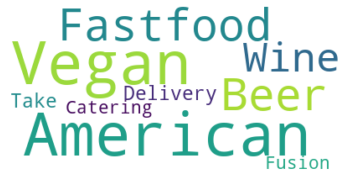

In [199]:
# display the word cloud
plt.imshow(cuisine_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

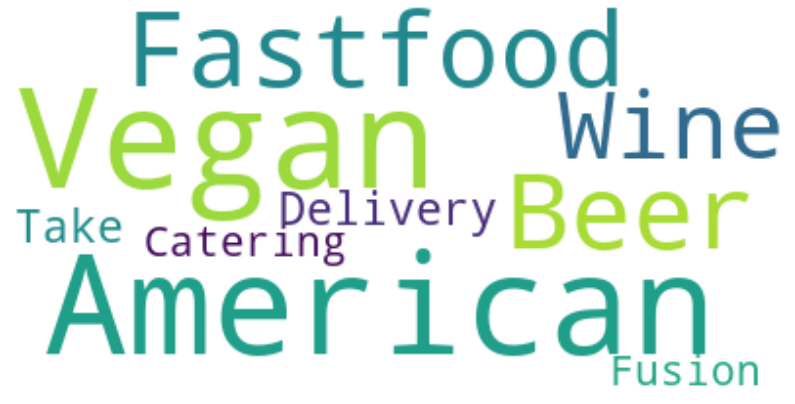

In [200]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(cuisine_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [610]:
# save mask to cali_mask
cali_mask = np.array(Image.open('../../Desktop/Statepngs/cali.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


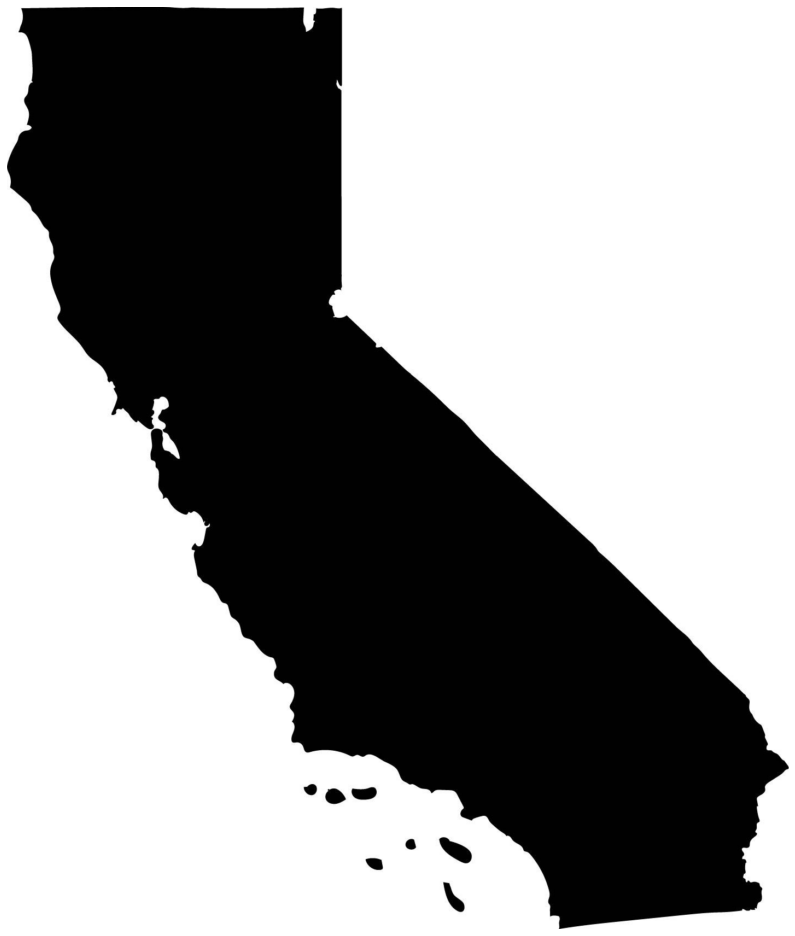

In [205]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(cali_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [897]:
# instantiate a word cloud object
cali_wc = WordCloud(background_color='white', max_words=2000, mask=cali_mask, stopwords=stopwords)

# generate the word cloud
cali_wc.generate(wc.Cuisine[3])

# display the word cloud
fig = plt.figure()
fig.set_figwidth(3) # set width
fig.set_figheight(5) # set height

plt.imshow(cali_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Cuisine'

##### USA Wordclouds

In [317]:
# Define stopwords

stopwords = set(STOPWORDS)
new = ['vegan', 'vegan-friendly', 'Vegan-friendly', 
       'beer/wine', 'american', 'beer', 'wine','take','friendly','lacto', 
       'Cuisine: Vegan', 'Cuisine: Vegan-friendly',
      'Take-out']
stopwords.update(new)
stopwords

{'Cuisine: Vegan',
 'Cuisine: Vegan-friendly',
 'Take-out',
 'Vegan-friendly',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'american',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'beer',
 'beer/wine',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'friendly',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'lacto',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mus

In [271]:
usa_words
    

'Cuisine: Vegan-friendly, Lacto, American, Pizza, International, Organic, Take-out, Bakery, Gluten-free, Breakfast, Cuisine: Vegan-friendly, American, Pizza, International, Organic, Take-out, Bakery, Gluten-free, Breakfast, Cuisine: Vegan-friendly, Lacto, American, Pizza, International, Organic, Take-out, Bakery, Gluten-free, Breakfast, Cuisine: Vegan, American, Thai, Take-out, Asian, Cuisine: Vegan, Bakery, Breakfast, Cuisine: Vegan-friendly, Take-out, Asian, Vietnamese, Cuisine: Vegan-friendly, Lacto, Ovo, American, Indian, International, Take-out, Fusion, Cuisine: Vegan-friendly, Lacto, Ovo, American, Beer/Wine, Catering, Cuisine: Vegan-friendly, Lacto, American, Organic, Raw, Fast food, Juice bar, Take-out, Gluten-free, Honey, Cuisine: Vegan-friendly, Ovo, American, Pizza, International, Organic, Take-out, Fusion, Cuisine: Vegan-friendly, Lacto, American, Pizza, International, Organic, Take-out, Bakery, Gluten-free, Breakfast, Cuisine: Lacto, American, Cuisine: Vegan-friendly, Lact

In [293]:
usa_words2 = raw['Cuisine'].to_list()
str(usa_words2)

"['Vegan-friendly,Lacto,American,Pizza,International,Organic,Take-out,Bakery,Gluten-free,Breakfast', 'Vegan-friendly,American,Pizza,International,Organic,Take-out,Bakery,Gluten-free,Breakfast', 'Vegan-friendly,Lacto,American,Pizza,International,Organic,Take-out,Bakery,Gluten-free,Breakfast', 'Vegan,American,Thai,Take-out,Asian', 'Vegan,Bakery,Breakfast', 'Vegan-friendly,Take-out,Asian,Vietnamese', 'Vegan-friendly,Lacto,Ovo,American,Indian,International,Take-out,Fusion', 'Vegan-friendly,Lacto,Ovo,American,Beer/Wine,Catering', 'Vegan-friendly,Lacto,American,Organic,Raw,Fastfood,Juicebar,Take-out,Gluten-free,Honey', 'Vegan-friendly,Ovo,American,Pizza,International,Organic,Take-out,Fusion', 'Vegan-friendly,Lacto,American,Pizza,International,Organic,Take-out,Bakery,Gluten-free,Breakfast', 'Lacto,American', 'Vegan-friendly,Lacto,Ovo,Fastfood,Take-out,MiddleEastern,Breakfast', 'Lacto,Ovo,American,Organic,Breakfast', 'Vegan,American,Pizza,Take-out,Bakery,Gluten-free,Breakfast', 'Vegan,American

In [291]:
# instantiate a word cloud object
usa_wc = WordCloud(
    background_color='white',
    max_words=10,
    stopwords=stopwords)

# generate the word cloud
usa_wc.generate(str(usa_words2))

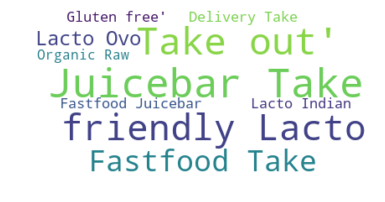

In [294]:
# display the word cloud
plt.imshow(usa_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

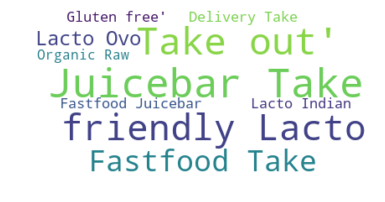

In [296]:
fig = plt.figure()
fig.set_figwidth(6) # set width
fig.set_figheight(10) # set height

# display the cloud
plt.imshow(usa_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [297]:
# save mask to usa_mask
usa_mask = np.array(Image.open('../../Desktop/Statepngs/USA7.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


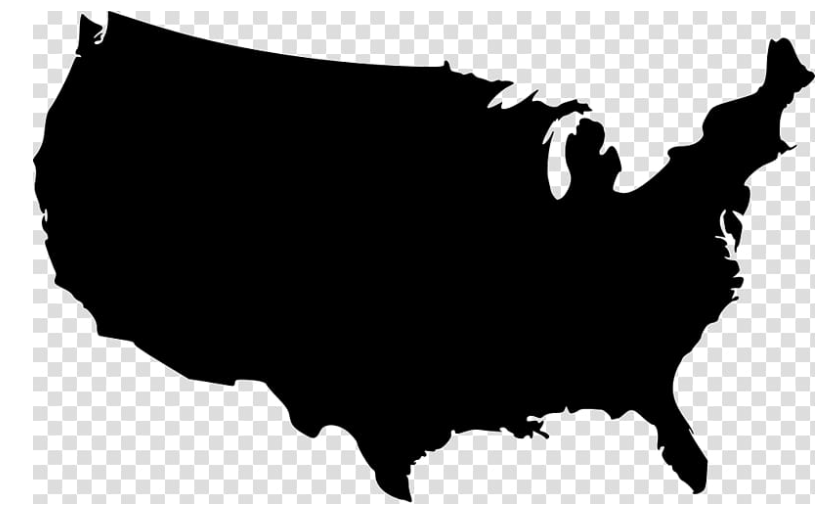

In [298]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(usa_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

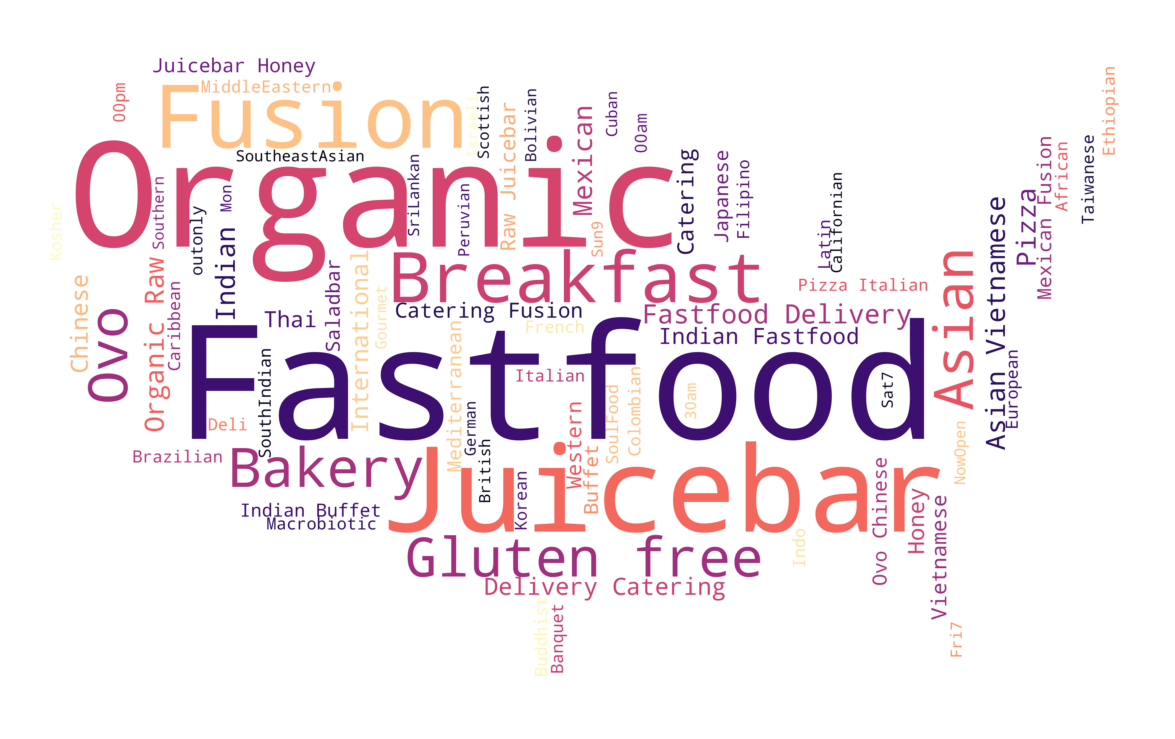

In [337]:
# instantiate a word cloud object
usa_wc = WordCloud(background_color='white', max_words=1000, 
                   contour_color='black', scale=10, prefer_horizontal=.1, 
                   #contour_width=.5, 
                   relative_scaling=0,
                   mask=usa_mask, colormap='magma', stopwords=stopwords)
#magma, viridis, inferno, jet, gray
# generate the word cloud
usa_wc.generate(cali_words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(30) # set height

plt.imshow(usa_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
cali = pd.read_csv(r'../../Desktop/calic.csv', index_col=None, header=0)
#cali_list = cali.Cuisine.to_list()
d = raw.loc[:, ['Cuisine', 'state']]   # Select two columns
cali_words = cali.Cuisine.str.cat(sep=', ')

In [93]:
# save mask to cali_mask
cali_mask = np.array(Image.open('../../Desktop/Statepngs/cali.png'))
#usa_mask = np.array(Image.open('../../Desktop/Statepngs/USA.png'))
print('Image downloaded and saved!')


Image downloaded and saved!


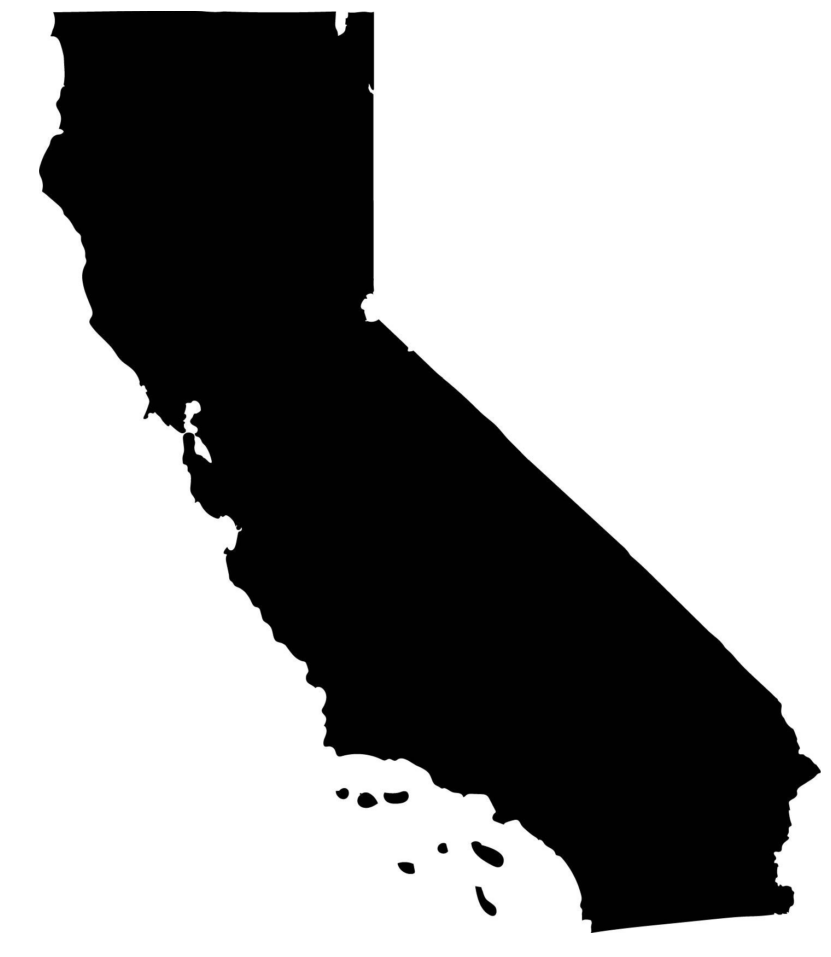

In [96]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(cali_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

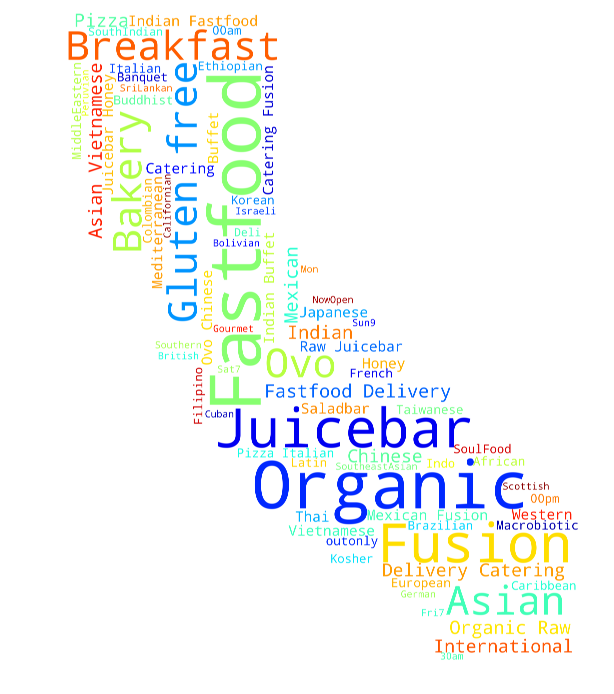

In [336]:
# instantiate a word cloud object
cali_wc = WordCloud(background_color='white', max_words=2000, 
                    relative_scaling=0,
                    colormap='jet', scale=10,
                    mask=cali_mask, stopwords=stopwords)

# generate the word cloud
cali_wc.generate(cali_words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(15) # set height

plt.imshow(cali_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [327]:
tx = pd.read_csv(r'../../Desktop/Prez/TX.csv', index_col=None, header=0)

tx_words = tx.cuisine.str.cat(sep=', ')

In [346]:
# save mask to cali_mask
tx_mask = np.array(Image.open('../../Desktop/Statepngs/truck4.png'))
#usa_mask = np.array(Image.open('../../Desktop/Statepngs/USA.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


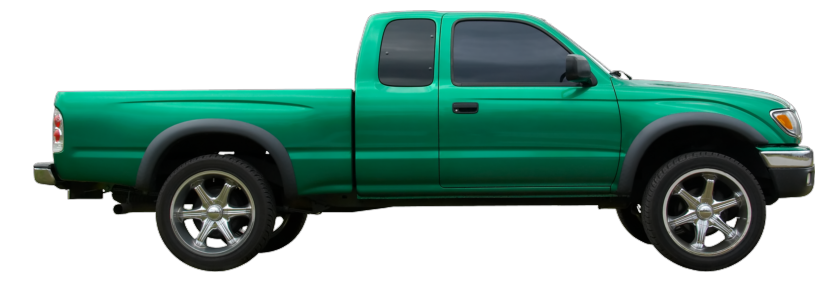

In [347]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(tx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

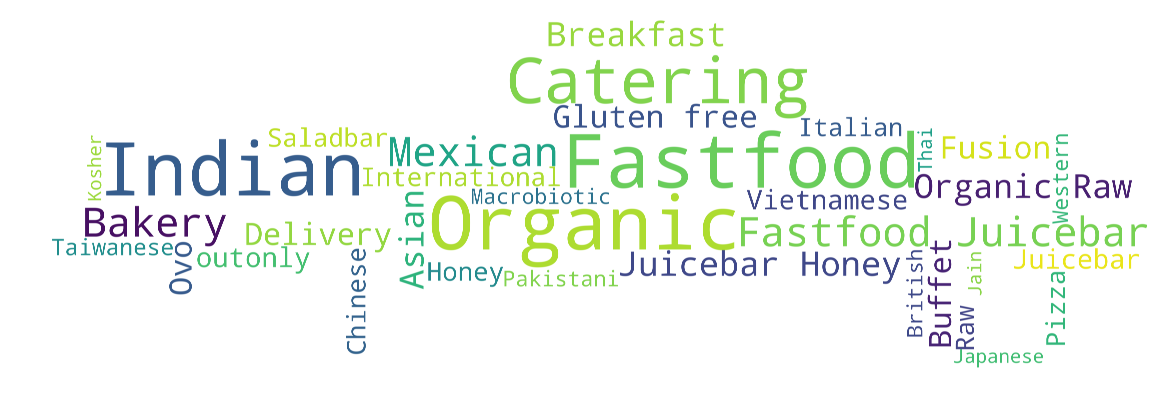

In [351]:
# instantiate a word cloud object
tx_wc = WordCloud(background_color='white',
                  relative_scaling=0,prefer_horizontal=.1, scale=10,
                  colormap='viridis',
                  max_words=2000, mask=tx_mask, stopwords=stopwords)

# generate the word cloud
tx_wc.generate(tx_words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(30) # set height

plt.imshow(tx_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [78]:
fl = pd.read_csv(r'../../Desktop/FL.csv', index_col=None, header=0)

fl_words = tx.cuisine.str.cat(sep=', ')

In [390]:
# save mask to cali_mask
fl_mask = np.array(Image.open('../../Desktop/Statepngs/ali2.png'))
#usa_mask = np.array(Image.open('../../Desktop/Statepngs/USA.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


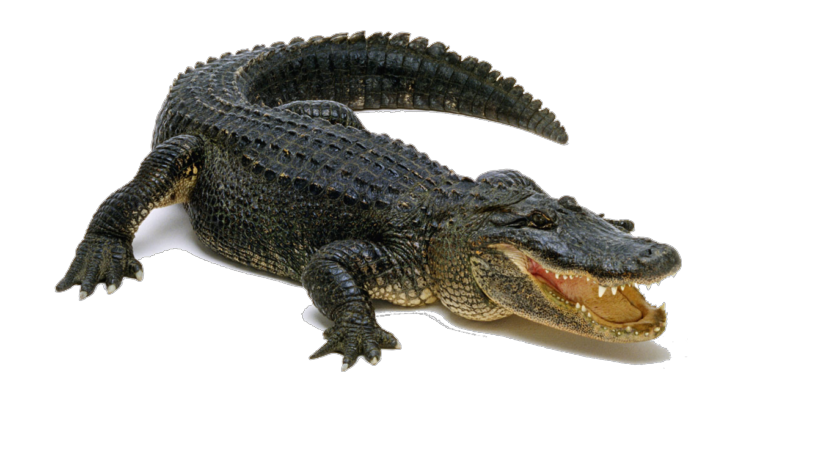

In [392]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(fl_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

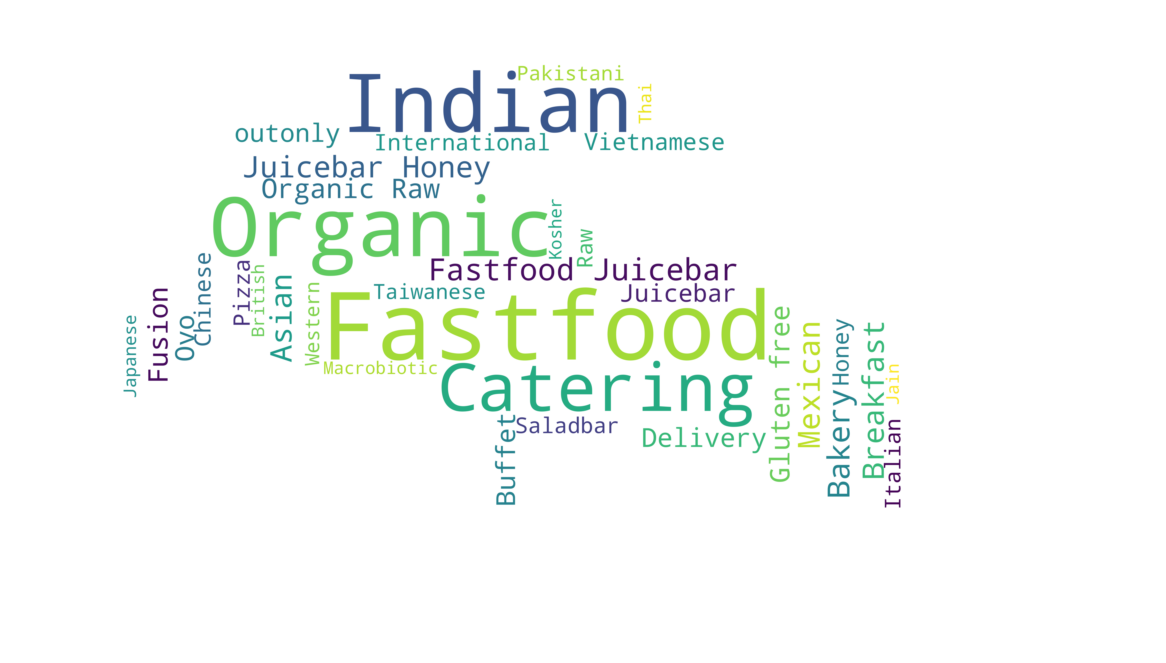

In [396]:
# instantiate a word cloud object
fl_wc = WordCloud(background_color='white', max_words=2000, 
                  relative_scaling=0,prefer_horizontal=.1, scale=10,
                  mask=fl_mask, stopwords=stopwords)

# generate the word cloud
fl_wc.generate(fl_words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(15) # set height

plt.imshow(fl_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Waffle Chart

In [802]:
#https://github.com/gyli/PyWaffle

In [673]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [676]:
raw.Category.value_counts(normalize=True)

Vegan         0.558275
Vegetarian    0.441725
Name: Category, dtype: float64

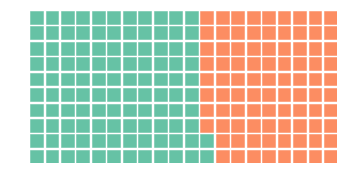

In [791]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=20, 
    values=[55.8275, 44.1725],
    figsize=(5, 3))  # figsize is a parameter of matplotlib.pyplot.figure)
plt.show()

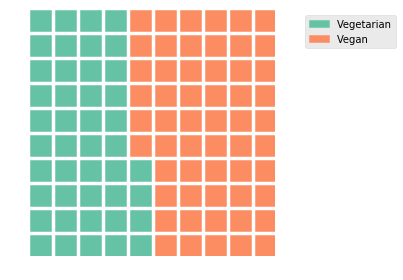

In [688]:
data = {'Vegetarian': 44, 'Vegan': 56}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

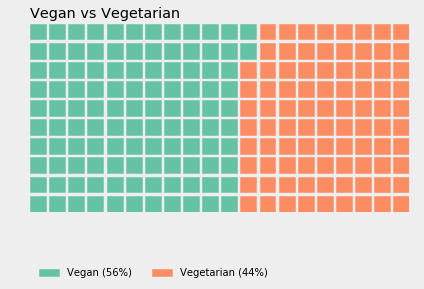

In [786]:
data = {'Vegan': 56, 'Vegetarian': 44}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=20,
    values=data, 
    #colors=("#983D3D", "#232066"),
    title={'label': 'Vegan vs Vegetarian', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    #icons='leaf', #https://fontawesome.com/icons?d=gallery&m=free
    starting_location='NW'
)
fig.set_facecolor('#EEEEEE')
plt.show()

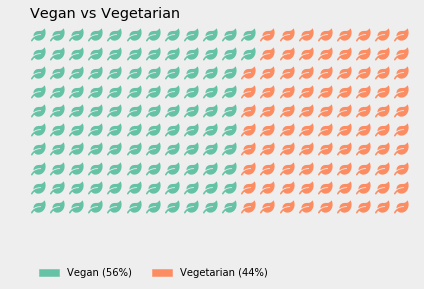

In [789]:
data = {'Vegan': 56, 'Vegetarian': 44}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=20,
    values=data, 
    #colors=("#983D3D", "#232066"),
    title={'label': 'Vegan vs Vegetarian', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    icons='leaf', #https://fontawesome.com/icons?d=gallery&m=free
    starting_location='NW'
)
fig.set_facecolor('#EEEEEE')
plt.show()

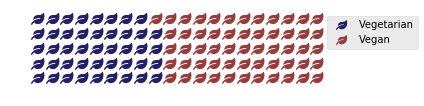

In [711]:
data = {'Vegetarian': 44, 'Vegan': 56}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='leaf', #https://fontawesome.com/icons?d=gallery&m=free
    font_size=12, 
    icon_legend=True
)

In [ ]:
#multiple plots in one

import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Hillary Clinton', 'Donald Trump', 'Others'],
        'Virginia': [1981473, 1769443, 233715],
        'Maryland': [1677928, 943169, 160349],
        'West Virginia': [188794, 489371, 36258],
    },
).set_index('labels')

# A glance of the data:
#                  Maryland  Virginia  West Virginia
# labels                                            
# Hillary Clinton   1677928   1981473         188794
# Donald Trump       943169   1769443         489371
# Others             160349    233715          36258


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': data['Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2016 Virginia Presidential Election Results', 'loc': 'left'}
        },
        '312': {
            'values': data['Maryland'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Maryland'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': '2016 Maryland Presidential Election Results', 'loc': 'left'}
        },
        '313': {
            'values': data['West Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['West Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': '2016 West Virginia Presidential Election Results', 'loc': 'left'}
        },
    },
    rows=5,  # shared parameter among subplots
    colors=("#2196f3", "#ff5252", "#999999"),  # shared parameter among subplots
    figsize=(9, 5)  # figsize is a parameter of plt.figure
)

## Modelling

In [671]:
# Set Pandas Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 50)
pd.set_option('display.max_colwidth', 50)

- **Logistic Regression**
- **Decision Tree**
- **BRF**
- **KNN**
- **SVM**
- Neural Network

#### Modelling Preparation

##### Cuisine

In [506]:
cs = df
cs.drop(columns=['Name', 'Vegan', 'Vegetarian', 'Rating', 'Street', 'City',
       'States', 'Address', 'Cuisine', 'Description'], axis=1, inplace=True)

In [295]:
#cs = pd.concat([cs.pop(x) for x in ['Cuisine', 'Category']], 1)

In [507]:
baseline_acc = cs.Category.value_counts(normalize=True).max()
baseline_acc

0.5577081615828524

In [588]:
cs

,Category,American,Asian,Australian,Ayurvedic,Bakery,Banquet,Bolivian,Brazilian,Breakfast,...,WestIndian,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,indian,saladbar
0,Vegetarian,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Vegetarian,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Vegetarian,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Vegan,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vegan,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,Vegan,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2422,Vegan,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2423,Vegan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2424,Vegetarian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
#df2 = cs['Cuisine'].str.get_dummies(',')
#df2 = pd.concat([df2,cs['Category']], axis=1)
#df2.shape

In [512]:
test = pd.get_dummies(cs.Category)
test = pd.concat([test,cs], axis=1)
#test.corr(2)


In [587]:
cs.columns

Index(['Category', 'American', 'Asian', 'Australian', 'Ayurvedic', 'Bakery',
       'Banquet', 'Bolivian', 'Brazilian', 'Breakfast', 'British', 'Buddhist',
       'Buffet', 'Cafeteria', 'Cajun', 'Californian', 'Caribbean', 'Chinese',
       'Colombian', 'Creole', 'Cuban', 'Deli', 'Dominican', 'Ecuadorian',
       'Egyptian', 'Ethiopian', 'European', 'Fastfood', 'Filipino', 'French',
       'Fusion', 'German', 'Gluten-free', 'Gourmet', 'Greek', 'Hawaiian',
       'Indo-Chinese', 'International', 'Ital', 'Italian', 'Jain', 'Jamaican',
       'Japanese', 'Juicebar', 'Korean', 'Kosher', 'Macrobiotic', 'Malaysian',
       'Mediterranean', 'Mexican', 'MiddleEastern', 'Nepalese', 'Organic',
       'Pakistani', 'PanAsian', 'Peruvian', 'Pizza', 'Polish', 'Polynesian',
       'Scottish', 'SouthIndian', 'SoutheastAsian', 'Spanish', 'SriLankan',
       'Syrian', 'Taiwanese', 'Thai', 'Turkish', 'Venezuelan', 'Vietnamese',
       'WestIndian', 'Western', 'indo-Chinese', 'latin', 'soulfood',
       '

In [589]:
df

,Name,Category,Vegan,Vegetarian,Rating,Street,City,Address,Cuisine,Description,...,WestIndian,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,indian,saladbar
0,Annapurna's World Vegetarian Cafe - 4th St,Vegetarian,0.0,1.0,4.5,5939 4th St NW,Albuquerque,"5939 4th St NW, Albuquerque, New Mexico","Vegan-friendly,Lacto,American,Pizza,Internatio...",The third Annapurna's Cafe opened in 2009 prev...,...,0,0,0,0,0,0,0,0,0,0
1,Annapurna's World Vegetarian Cafe - The Promenade,Vegetarian,0.0,1.0,5.0,5200 Eubank NE Ste E7,Albuquerque,"5200 Eubank NE Ste E7, Albuquerque, New Mexico","Vegan-friendly,American,Pizza,International,Or...",Its 4th location in NM offering Ayurvedic cuis...,...,0,0,0,0,0,0,0,0,0,0
2,Annapurna's World Vegetarian Cafe - UNM,Vegetarian,0.0,1.0,4.0,2201 Silver Ave SE,Albuquerque,"2201 Silver Ave SE, Albuquerque, New Mexico","Vegan-friendly,Lacto,American,Pizza,Internatio...",Vegetarian restaurant opened since the 2000s n...,...,0,0,0,0,0,0,0,0,0,0
3,Thai Vegan,Vegan,1.0,0.0,5.0,5505 Osuna Rd NE (at San Mateo),Albuquerque,"5505 Osuna Rd NE (at San Mateo), Albuquerque,...","Vegan,American,Thai,Take-out,Asian","Offers primarily Thai food such as pad thai, l...",...,0,0,0,0,0,0,0,0,0,0
4,Wanderlust Vegan Eatery,Vegan,0.0,1.0,4.5,1425 4th St NW,Albuquerque,"1425 4th St NW, Albuquerque, New Mexico","Vegan,Bakery,Breakfast",Vegan cafe/bakery that opened this permanent l...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,Savory Leaf Cafe,Vegan,NaN,NaN,5.0,960 Spruce Street,Lawrence Township,"960 Spruce Street, Lawrence Township, NJ 0864...","Vegan,American,Breakfast",Located inside the farmer's market. Offers the...,...,0,0,0,0,0,0,0,0,0,0
4848,Killer Vegan,Vegan,NaN,NaN,4.0,996 Stuyvesant Ave,Union,"996 Stuyvesant Ave, Union, New Jersey","Vegan,American,Organic,Take-out,Bakery",Vegan restaurant opened Sept 2014 serving in-h...,...,0,0,0,0,0,0,0,0,0,0
4849,Vegans Are Us,Vegan,NaN,NaN,4.0,636 E Landis Ave,Vineland,"636 E Landis Ave, Vineland, New Jersey","Vegan,International,Catering",Vegan restaurant est. Nov 2019 that evolved fr...,...,0,0,0,0,0,0,0,0,0,0
4850,Epicure,Vegetarian,NaN,NaN,5.0,2802 New Jersey Ave,Wildwood,"2802 New Jersey Ave, Wildwood, New Jersey","Vegan-friendly,American",Open summer months only. Small cafe with garde...,...,0,0,0,0,0,0,0,0,0,0


##### Rating

In [673]:
df1 = pd.concat([cs, df.Rating], axis=1)
df1.Rating.fillna("0.0", inplace = True) 

In [667]:
df.Rating.value_counts()

4.5    882
5.0    881
4.0    309
0.0    157
3.5     64
3.0     32
2.0      9
2.5      4
Name: Rating, dtype: int64

In [582]:
df1.corr()

,American,Asian,Australian,Ayurvedic,Bakery,Banquet,Bolivian,Brazilian,Breakfast,British,...,Western,indo-Chinese,latin,soulfood,southernamerican,african,israeli,indian,saladbar,Rating
American,1.000000,-0.189777,0.018550,-0.031445,0.144818,-0.031445,-0.031445,0.032156,0.140454,0.003951,...,-0.059585,-0.031445,-0.050533,0.010234,-0.050655,-0.073291,-0.064735,-0.476925,-0.012798,0.029938
Asian,-0.189777,1.000000,0.040943,-0.006413,-0.067953,-0.006413,-0.006413,0.013175,-0.079576,0.057927,...,0.030330,-0.006413,0.010417,-0.023179,0.000053,-0.018165,-0.019270,-0.065266,-0.027850,0.050190
Australian,0.018550,0.040943,1.000000,-0.000583,-0.011197,-0.000583,-0.000583,-0.001430,-0.009801,-0.001167,...,-0.004987,-0.000583,-0.002931,-0.002108,-0.001939,-0.001652,-0.001753,0.034392,-0.005406,0.011011
Ayurvedic,-0.031445,-0.006413,-0.000583,1.000000,-0.007916,-0.000412,-0.000412,-0.001011,-0.006929,-0.000825,...,-0.003526,-0.000412,-0.002072,-0.001491,-0.001371,-0.001168,-0.001239,0.055993,0.107892,0.005227
Bakery,0.144818,-0.067953,-0.011197,-0.007916,1.000000,-0.007916,-0.007916,0.029640,0.229684,0.044207,...,0.004588,-0.007916,0.020534,-0.011926,-0.008176,-0.022421,-0.003750,-0.103364,-0.026457,0.031295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
african,-0.073291,-0.018165,-0.001652,-0.001168,-0.022421,-0.001168,-0.001168,-0.002864,-0.019627,-0.002338,...,-0.009987,-0.001168,0.065326,-0.004222,-0.003882,1.000000,-0.003510,-0.020861,-0.010826,0.018428
israeli,-0.064735,-0.019270,-0.001753,-0.001239,-0.003750,-0.001239,-0.001239,-0.003038,0.001363,-0.002480,...,-0.010595,-0.001239,-0.006227,-0.004479,-0.004118,-0.003510,1.000000,-0.022131,-0.011485,-0.042362
indian,-0.476925,-0.065266,0.034392,0.055993,-0.103364,0.055993,-0.007365,-0.018058,-0.106918,-0.014739,...,-0.040082,0.055993,-0.037007,-0.026620,-0.024477,-0.020861,-0.022131,1.000000,-0.004584,-0.070246
saladbar,-0.012798,-0.027850,-0.005406,0.107892,-0.026457,-0.003822,-0.003822,-0.009372,0.009973,-0.007649,...,0.048042,-0.003822,0.003249,-0.013815,-0.012703,-0.010826,-0.011485,-0.004584,1.000000,-0.021813


##### 

#### Logistic Regression

##### Predictors: Cuisine - correlated types

In [556]:
# Assign variables and instantiate model

X = cs.copy()
y = X.pop('Category')

model = LogisticRegression(solver='lbfgs')

In [557]:
# Cross-validating the accuracy of the model

In [558]:
accs = cross_val_score(model, X, y)#, #cv=10)
print(accs)
print(np.mean(accs))

[0.66625464 0.70704574 0.7029703 ]
0.6920902226192953


In [559]:
# Shuffle dataset 

In [560]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accs = cross_val_score(model, X, y, cv=kf)
print(accs)
print(np.mean(accs))

[0.61885246 0.72131148 0.69672131 0.69834711 0.66528926 0.64876033
 0.71487603 0.75619835 0.69834711 0.68181818]
0.6900521609538003


In [306]:
# Confusion Matrix

In [561]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predictions, labels=['Vegan', 'Vegetarian']))

#TP #FN
#FP #TN

NameError: name 'predictions' is not defined

In [642]:
# Classification Report

In [562]:
from sklearn.metrics import classification_report
model.fit(X, y)
predictions = model.predict(X)
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

       Vegan     0.7058    0.8049    0.7521      1353
  Vegetarian     0.7010    0.5769    0.6329      1073

    accuracy                         0.7040      2426
   macro avg     0.7034    0.6909    0.6925      2426
weighted avg     0.7037    0.7040    0.6994      2426



##### Predictors: Cuisine + Rating

In [691]:
# Assign variables and instantiate model
X = df1.copy()
y = X.pop('Category')

#Standardized
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]


array([[ 0.64579879, -0.31579743, -0.02872425, -0.02030692,  2.56539471,
        -0.02030692, -0.02030692, -0.04979296,  2.93068811, -0.04063899,
        -0.05379366, -0.24083732, -0.02030692, -0.02872425, -0.02030692,
        -0.1619467 , -0.20949903, -0.02030692, -0.02030692, -0.02872425,
        -0.02030692, -0.02030692, -0.02030692, -0.02872425, -0.05751973,
        -0.10204082, -0.67929801, -0.02872425, -0.04979296, -0.39956956,
        -0.02872425,  2.36482374, -0.02872425, -0.02030692, -0.06748974,
        -0.08884618,  3.23162439, -0.02030692, -0.14944764, -0.02030692,
        -0.07618603, -0.10999298, -0.67605995, -0.06748974, -0.10999298,
        -0.0911732 , -0.02872425, -0.16852853, -0.24934239, -0.15230549,
        -0.02030692,  1.55463867, -0.02872425, -0.02872425, -0.02872425,
         3.73835641, -0.02030692, -0.02030692, -0.02030692, -0.02030692,
        -0.02030692, -0.04979296, -0.02030692, -0.02030692, -0.07618603,
        -0.15371627, -0.02872425, -0.02872425, -0.2

In [692]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1940, 80) (1940,)
Test set: (486, 80) (486,)


In [696]:
model = LogisticRegression(C=0.01, solver='lbfgs', max_iter=1200000)
# Cross-validate the accuracy of the model
accs = cross_val_score(model, X, y, cv=10)
print(accs)
print(np.mean(accs))

[0.66803279 0.68032787 0.64754098 0.69421488 0.7231405  0.67355372
 0.73966942 0.72727273 0.60330579 0.69834711]
0.6855405771575668


In [698]:
model = LogisticRegression(C=0.01, solver='lbfgs', max_iter=1200000).fit(X_train,y_train)
yhat = model.predict(X_test)
yhat

array(['Vegan', 'Vegan', 'Vegetarian', 'Vegan', 'Vegetarian', 'Vegan',
       'Vegan', 'Vegan', 'Vegan', 'Vegetarian', 'Vegan', 'Vegetarian',
       'Vegan', 'Vegetarian', 'Vegan', 'Vegan', 'Vegan', 'Vegetarian',
       'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegetarian', 'Vegetarian',
       'Vegan', 'Vegan', 'Vegetarian', 'Vegan', 'Vegan', 'Vegetarian',
       'Vegan', 'Vegetarian', 'Vegetarian', 'Vegetarian', 'Vegan',
       'Vegan', 'Vegetarian', 'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan',
       'Vegan', 'Vegetarian', 'Vegetarian', 'Vegan', 'Vegan',
       'Vegetarian', 'Vegan', 'Vegan', 'Vegetarian', 'Vegetarian',
       'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegetarian',
       'Vegan', 'Vegetarian', 'Vegetarian', 'Vegetarian', 'Vegetarian',
       'Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegetarian', 'Vegetarian',
       'Vegetarian', 'Vegetarian', 'Vegetarian', 'Vegetarian',
       'Vegetarian', 'Vegan', 'Vegan', 'Vegetarian', 'Vegetarian',
       'Vegan', 'Vegetaria

In [687]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
accs = cross_val_score(model, X, y, cv=kf)
print(accs)
print(np.mean(accs))

[0.62704918 0.70901639 0.68852459 0.67355372 0.65289256 0.66115702
 0.68595041 0.72727273 0.74380165 0.67768595]
0.6846904213521203


In [685]:
from sklearn.metrics import classification_report
model.fit(X, y)
predictions = model.predict(X)
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

       Vegan     0.6984    0.8182    0.7536      1353
  Vegetarian     0.7075    0.5545    0.6217      1073

    accuracy                         0.7016      2426
   macro avg     0.7030    0.6864    0.6877      2426
weighted avg     0.7024    0.7016    0.6953      2426



#### Decision Tree

##### Predictors: Cuisine

In [572]:
from sklearn.tree import DecisionTreeClassifier

In [570]:
X = cs.copy()
y = X.pop('Category')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y, random_state=1)

In [573]:
# fit and evaluate the decision tree classifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print(classifier.score(X_test, y_test))

0.8185567010309278
0.6809381037208878
0.6851851851851852


In [575]:
pd.DataFrame(list(zip(df1.columns, classifier.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

,Feature,Importance
77,israeli,0.248363
42,Japanese,0.057430
51,Nepalese,0.052539
55,Peruvian,0.045863
29,French,0.042885
...,...,...
54,PanAsian,0.000000
53,Pakistani,0.000000
5,Bakery,0.000000
37,International,0.000000


##### Predictors: Cuisine + Rating

In [674]:
# Assign variables and instantiate model
X = df1.copy()
y = X.pop('Category')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=y, random_state=1)

In [675]:
# fit and evaluate the decision tree classifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None, 
                                    random_state=1)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(cross_val_score(classifier, X_train, y_train, cv=5).mean())
print(classifier.score(X_test, y_test))

0.8716494845360825
0.6881493255583174
0.6975308641975309


In [677]:
pd.DataFrame(list(zip(df1.columns, classifier.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)

,Feature,Importance
77,israeli,0.202502
79,saladbar,0.114406
0,Category,0.062422
51,Nepalese,0.053378
55,Peruvian,0.042989
42,Japanese,0.042438
8,Brazilian,0.040036
26,European,0.037047
31,German,0.036873
29,French,0.035204


#### Bagging Random Forests

##### Predictors: Cuisine

In [326]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, shuffle=True, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)

print("KNN CV training score:\t", 
      cross_val_score(knn, X_train, y_train, cv=5,
                    n_jobs=1).mean())
knn.fit(X_train, y_train)
print("KNN test score:\t", knn.score(X_test, y_test))

KNN CV training score:	 0.6858251540744122
KNN test score:	 0.6933701657458563


In [327]:
y_test.value_counts(normalize=True)

Vegan         0.558011
Vegetarian    0.441989
Name: Category, dtype: float64

In [328]:
bagging = BaggingClassifier(base_estimator=knn,
                            max_samples=0.5, 
                            max_features=0.5)

print("Bagging CV training score:\t", 
      cross_val_score(bagging, X_train, y_train,
                    cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("KNN bagging test score:\t", bagging.score(X_test, y_test))

Bagging CV training score:	 0.6834618018366021
KNN bagging test score:	 0.7030386740331491


In [329]:
bagging = BaggingClassifier(base_estimator=knn,
                            max_samples=1., 
                            max_features=1.,
                            n_estimators=100)

print("Bagging CV training score:\t", 
      cross_val_score(bagging, X_train, y_train,
                    cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("KNN bagging test score:\t", bagging.score(X_test, y_test))

Bagging CV training score:	 0.7018366021105121
KNN bagging test score:	 0.7154696132596685


In [330]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

print("DT CV training score:\t", 
      cross_val_score(dt, X_train, y_train, cv=5,
                    n_jobs=1).mean())
dt.fit(X_train, y_train)
print("DT test score:\t", dt.score(X_test, y_test))

DT CV training score:	 0.6769265885905922
DT test score:	 0.6740331491712708


In [331]:
bagging = BaggingClassifier(base_estimator=dt,
                            max_samples=0.8, 
                            max_features=0.8, 
                            n_estimators=100)

print("DT Bagging CV training score:\t", 
      cross_val_score(bagging, X_train, y_train,
                    cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("DT bagging test score:\t", bagging.score(X_test, y_test))

DT Bagging CV training score:	 0.7059680789422857
DT bagging test score:	 0.7140883977900553


In [332]:
bagging = BaggingClassifier(base_estimator=dt,
                            max_samples=1.0, 
                            max_features=1.0, 
                            n_estimators=500)

print("DT Bagging CV training score:\t", 
      cross_val_score(bagging, X_train, y_train,
                    cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("DT bagging test score:\t", bagging.score(X_test, y_test))

DT Bagging CV training score:	 0.6917528488402719
DT bagging test score:	 0.68646408839779


In [333]:
from sklearn.model_selection import GridSearchCV

model = BaggingClassifier(base_estimator=knn, n_estimators=100)
params = {'max_samples': np.linspace(0.8, 1.0, 3),
          'max_features': range(int(3/4.*X.shape[1]), X.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=62,
                  max_samples=0.9, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [336]:
print(grid.score(X_train, y_train))
print(grid.best_score_)
print(grid.score(X_test, y_test))

0.8654416123295792
0.7101363366923533
0.7237569060773481


In [334]:
model = BaggingClassifier(base_estimator=dt, n_estimators=100)
params = {'max_samples': np.linspace(0.8, 1.0, 3),
          'max_features': range(int(3/4.*X.shape[1]), X.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [335]:
print(grid.score(X_train, y_train))
print(grid.best_score_)
print(grid.score(X_test, y_test))

0.8654416123295792
0.7101363366923533
0.7237569060773481


In [665]:
# extract base estimator
grid.best_estimator_.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [337]:
# extract each of the fitted estimators
len(grid.best_estimator_.estimators_)

100

In [338]:
# extract which samples have been used by each of the first base estimators
grid.best_estimator_.estimators_samples_[0][:10]

array([ 214,  891,   79, 1050,  944,  893,  354, 1540, 1289, 1196])

In [339]:
# extract the features used by the first base estimator
grid.best_estimator_.estimators_features_[0]

array([73, 65,  4, 72, 46, 42, 38, 71, 17, 25, 64, 58, 76, 67, 29, 61,  0,
       78, 60, 63, 27, 55,  3, 54, 44, 39, 41, 49, 32,  1, 40, 53, 21, 23,
       56, 35, 28,  2, 69, 33, 36, 77, 16, 43, 81, 12, 24, 52, 30, 14, 70,
       79, 20, 47, 26, 31, 45, 50,  8, 13, 37])

##### Predictors: Cuisine + Rating

In [707]:
# Assign variables and instantiate model
X = df1.copy()
y = X.pop('Category')

#### KNearest Neighbor

##### Predictors: Cuisine

In [669]:
from sklearn.neighbors import KNeighborsClassifier

X = df2.copy()
y = X.pop('Category')

# make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [670]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

0.7517564402810304


In [671]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=99)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6302652106084243


In [672]:
knn.score(X_train, y_train)

0.83125

In [673]:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5538221528861155


In [674]:
knn.score(X_train, y_train)

0.553125

In [675]:
# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

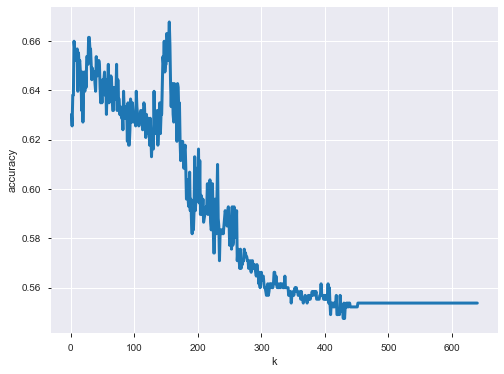

In [676]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, X_train.shape[0]+1), test_acc, lw=3.)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show()

In [677]:
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

1024.0


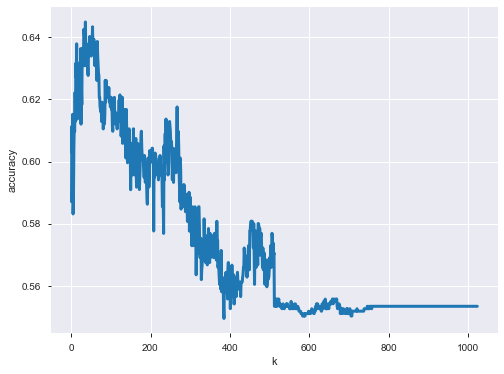

In [678]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3.)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show()

In [679]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [680]:
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

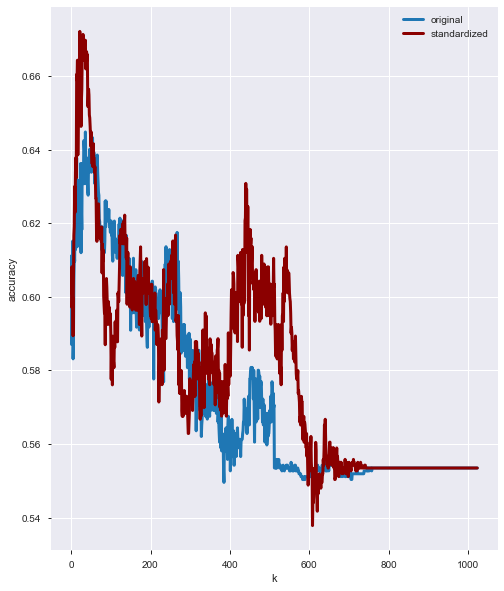

In [683]:
fig, ax = plt.subplots(figsize=(8,10))
ax.plot(range(1, int(max_neighbors)), test_acc, lw=3., label='original')
ax.plot(range(1, int(max_neighbors)), test_acc_std, lw=3., color='darkred', label='standardized')
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.legend()
plt.show()

##### Predictors: Cuisine + Rating

In [699]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1940, 80) (1940,)
Test set: (486, 80) (486,)


In [701]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.64579879, -0.31579743, -0.02872425, -0.02030692,  2.56539471,
        -0.02030692, -0.02030692, -0.04979296,  2.93068811, -0.04063899,
        -0.05379366, -0.24083732, -0.02030692, -0.02872425, -0.02030692,
        -0.1619467 , -0.20949903, -0.02030692, -0.02030692, -0.02872425,
        -0.02030692, -0.02030692, -0.02030692, -0.02872425, -0.05751973,
        -0.10204082, -0.67929801, -0.02872425, -0.04979296, -0.39956956,
        -0.02872425,  2.36482374, -0.02872425, -0.02030692, -0.06748974,
        -0.08884618,  3.23162439, -0.02030692, -0.14944764, -0.02030692,
        -0.07618603, -0.10999298, -0.67605995, -0.06748974, -0.10999298,
        -0.0911732 , -0.02872425, -0.16852853, -0.24934239, -0.15230549,
        -0.02030692,  1.55463867, -0.02872425, -0.02872425, -0.02872425,
         3.73835641, -0.02030692, -0.02030692, -0.02030692, -0.02030692,
        -0.02030692, -0.04979296, -0.02030692, -0.02030692, -0.07618603,
        -0.15371627, -0.02872425, -0.02872425, -0.2

In [703]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [704]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7783505154639175
Test set Accuracy:  0.6748971193415638


In [705]:
neigh.score(X_train, y_train)

0.7783505154639175

In [706]:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.565843621399177


#### Support Vector Machine (SVM)

##### Predictors: Cuisine + Rating

In [685]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

X = df2.copy()
y = X.pop('Category')

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [686]:
def get_accuracy(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    scores_train = cross_val_score(model, X_train, y_train, cv=cv)
    predictions_test = model.predict(X_test)
    sm = scores_train.mean()
    print("Average training score: {:0.3}".format(sm))
    print("Test score: {:0.3}".format(model.score(X_test, y_test)))
    return predictions_test


def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=[
                            'Predicted'], margins=True)
    print(confusion)
    print()
    print(metrics.classification_report(y_true, y_pred))

In [687]:
model_1 = LinearSVC(loss='hinge', max_iter=5000)
model_2 = SVC(kernel='linear', gamma='scale')

In [688]:
model_1.fit(X_train, y_train)
model_1.score(X_train, y_train)

0.6845703125

In [689]:
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)

0.6845703125

In [690]:
model_lin = LinearSVC(max_iter=50000)
model_rbf = SVC(kernel='rbf', gamma='scale')

In [691]:
predictions = get_accuracy(model_lin, X_train, y_train, X_test, y_test, cv=5)
print_cm_cr(y_test, predictions)

Average training score: 0.646
Test score: 0.619
Predicted   Vegan  Vegetarian  All
Actual                            
Vegan         104          38  142
Vegetarian     60          55  115
All           164          93  257

              precision    recall  f1-score   support

       Vegan       0.63      0.73      0.68       142
  Vegetarian       0.59      0.48      0.53       115

    accuracy                           0.62       257
   macro avg       0.61      0.61      0.60       257
weighted avg       0.62      0.62      0.61       257



In [692]:
predictions = get_accuracy(model_rbf, X_train, y_train, X_test, y_test, cv=5)
print_cm_cr(y_test, predictions)

Average training score: 0.659
Test score: 0.658
Predicted   Vegan  Vegetarian  All
Actual                            
Vegan         104          38  142
Vegetarian     50          65  115
All           154         103  257

              precision    recall  f1-score   support

       Vegan       0.68      0.73      0.70       142
  Vegetarian       0.63      0.57      0.60       115

    accuracy                           0.66       257
   macro avg       0.65      0.65      0.65       257
weighted avg       0.66      0.66      0.66       257



In [693]:
def grid_search_func(estimator, params, X_train, y_train, X_test, y_test, scoring_function=metrics.accuracy_score, scoring='accuracy', cv=5):
    gs = GridSearchCV(
        estimator=estimator,
        param_grid=params,
        return_train_score=True,
        scoring=scoring,
        cv=cv)

    gs.fit(X_train, y_train)

    print("Best score")
    print(gs.best_score_)
    print()
    print("Best estimator")
    print(gs.best_estimator_.get_params())
    print()

    predictions = gs.best_estimator_.predict(X_test)
    print('Test score: ', scoring_function(y_test, predictions))
    print()
    print_cm_cr(y_test, predictions)

    return gs

In [695]:
params_lin = {'C': np.logspace(-2, 2, 11),
              'fit_intercept': [True]}
gs_lin = grid_search_func(model_lin, params_lin,
                          X_train, y_train, X_test, y_test,
                          scoring_function=metrics.accuracy_score,
                          scoring='accuracy')

/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarni

KeyboardInterrupt: 

In [ ]:
params_rbf = {'C': np.logspace(-2, 2, 11),
              'gamma': np.linspace(0.01, 2, 10)}
gs_rbf = grid_search_func(model_rbf, params_rbf,
                          X_train, y_train, X_test, y_test)

In [ ]:
gs_lin_pr = grid_search_func(model_lin, params_lin,
                             X_train, y_train, X_test, y_test,
                             scoring_function=metrics.precision_score,
                             scoring='precision')

In [696]:
gs_rbf_pr = grid_search_func(model_rbf, params_rbf,
                             X_train, y_train, X_test, y_test,
                             scoring_function=metrics.precision_score,
                             scoring='precision')

/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1243: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['Vegan', 'Vegetarian'], dtype='<U10')

##### Predictors: Cuisine + Rating

In [716]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (1940, 80) (1940,)
Test set: (486, 80) (486,)


In [717]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [718]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Vegan', 'Vegan', 'Vegan', 'Vegan', 'Vegan'], dtype=object)

In [719]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [720]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6502791928208367

In [721]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/axellillsunde/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning:

jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.



0.676954732510288

#### ADA BOOST

In [733]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

ModuleNotFoundError: No module named 'sklearn.grid_search'

0.8685567010309279
0.6990060538040336
0.6893004115226338
0.6893004115226338


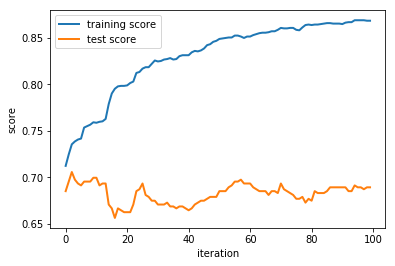

ValueError: Shape of passed values is (80, 1), indices imply (2426, 1)

In [725]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, test_size=0.2, random_state=1)

base_estimator = DecisionTreeClassifier(max_depth=4)
model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=4).mean())
print(model.score(X_test, y_test))
print(pd.DataFrame(model.staged_predict(X_test)
                   ).T.apply(lambda x: accuracy_score(y_test, x),
                             axis=0)[model.n_estimators-1])

plt.plot(list(model.staged_score(X_train, y_train)),
         label='training score', lw=2)
plt.plot(list(model.staged_score(X_test, y_test)), label='test score', lw=2)
plt.xlabel('iteration')
plt.ylabel('score')
plt.legend()
plt.show()

pd.DataFrame(model.feature_importances_,
             columns=['importance'],
             index=df1.index
             ).sort_values(by='importance', ascending=False
                           ).plot(kind='barh', figsize=(10, 12))
plt.show()
0.9626277815751499

In [727]:
from sklearn.metrics import classification_report
model.fit(X, y)
predictions = model.predict(X)
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

       Vegan     0.8577    0.8906    0.8738      1353
  Vegetarian     0.8550    0.8136    0.8338      1073

    accuracy                         0.8566      2426
   macro avg     0.8563    0.8521    0.8538      2426
weighted avg     0.8565    0.8566    0.8561      2426



In [734]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, predictions, labels=['Vegan', 'Vegetarian']))

#TP #FN
#FP #TN

[[1205  148]
 [ 200  873]]


In [739]:
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)
params = {'max_samples': np.linspace(0.8, 1.0, 3),
          'max_features': range(int(3/4.*X.shape[1]), X.shape[1]+1)}

grid = GridSearchCV(model, param_grid=params, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_

ValueError: Invalid parameter max_features for estimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                                         splitter='best'),
                   learning_rate=1.0, n_estimators=100, random_state=1). Check the list of available parameters with `estimator.get_params().keys()`.